# Study of Solar Events

* Alberto Guirado Fernandez
* Ritsumeikan University

## 1. Introduction
### General description of the data
The dataset provides information about solar events detected by the Ramaty High Energy Solar Spectroscopic Imager.

### Features of Solar Events:

* **Peak Rate**: It's the maximum number of solar flares observed in one second within a certain energy range.
* **Total Counts**: It represents the total number of solar flares observed during the entire duration of the flare. 
* **Energy**: Indicates the maximum amount of energy detected during a solar flare. The highest energy band in which the flare was observed, measured in kilo electronvolts (keV).
* **Radial Distance**: It's the distance from the center of the Sun to where the solar flare is detected.
* **Quality Codes**: These are labels that tell us how reliable the data we are looking at is. For example, if there are technical issues during the detection of the flare, these codes will indicate it. "Qn" , where n is the total number of data gap, SAA (South Atlantic Anomaly), particle, eclipse, or decimation flags set for the event.
* **Active Region**: Tells us if there is any particularly active region on the Sun near where the solar flare occurs. A number for the closest active region, if available.
* **Radial Offset**: Shows us how far the solar flare is from the spin axis of the spacecraft detecting it. The offset of the flare position from the spin axis of the spacecraft in arcseconds. This is used in spectroscopy.

The main columns we're going to use is duration.s and energy.kev

URL -> https://www.kaggle.com/datasets/khsamaha/solar-flares-rhessi?select=hessi.solar.flare.UP_To_2018.csv



## 2. Objectives

In this study, the analysis of the duration and energy data will be carried out to try to know if we are able to predict the characteristics of future solar flares.

## 3. Research questions
For this we are going to use different prediction methods.

* 1. Are there seasonal patterns in the occurrence and characteristics of solar flares? 
    * Identify if there is a periodicity or seasonality in the frequency of the flares and their characteristics (such as energy and duration).


* 2. What is the long-term trend in the energy and duration of solar flares?
    * Determine if there is an increasing or decreasing trend in the energy and duration of the flares over time.


* 3. Is it possible to predict the duration and energy of a solar flare based on historical data?
    * Develop a predictive model for the duration and energy of solar flares using historical data.



## 4. Data Analysis

We are going to carry out an analysis of the data and try to answer the questions previously asked.


In [152]:
import random  # Functions related to random number generation
import numpy as np  # Numerical library for mathematical operations
import os  # Functions related to the operating system
import pandas as pd  # Library for data manipulation and analysis of tabular data
import time  # To calculate the runtime
import seaborn as sns
import calendar

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.ar_model import AutoReg
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, MaxPooling1D, Conv1D, TimeDistributed, Flatten, ConvLSTM2D, RepeatVector, TimeDistributed

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


In [153]:
#We take the data from the file that we have in the same folder 
df = pd.read_csv("hessi.solar.flare.UP_To_2018.csv", parse_dates=['start.date'], index_col='start.date')
df

,flare,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start.date,,,,,,,,,,,,,,,,,
2002-02-12,2021213,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
2002-02-12,2021228,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2002-02-13,2021332,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
2002-02-13,2021308,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
2002-02-13,2021310,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-09,18020903,16:41:28,16:42:54,16:43:32,124,18,2888.0,6-12,-345,-38,347,2699,A0,DF,P1,PE,Q2
2018-02-09,18020904,18:15:56,18:17:26,18:17:40,104,16,1656.0,6-12,-268,-38,271,2699,A0,DF,P1,PE,Q2
2018-02-10,18021001,13:04:36,13:06:46,13:07:04,148,15,2224.0,6-12,-115,-38,121,2699,A0,DF,P1,PE,Q2


In [154]:
import pandas as pd
import numpy as np


df.index = pd.to_datetime(df.index)

# Empty DataFrame to store the results
annual_data = pd.DataFrame()

# Iterate over each year in the DataFrame
for year, year_group in df.groupby(df.index.year):
    # Iterate over each month of the current year
    for month, month_group in year_group.groupby(year_group.index.month):
        # Check if month_group has enough rows to select 3 random days
        if len(month_group) >= 3:
            random_days = month_group.sample(n=3, random_state=1)  # Adjust random_state as needed
        else:
            random_days = month_group  # If the group has fewer than 3 rows, select all
        
        # Append the randomly selected days to the result DataFrame
        annual_data = pd.concat([annual_data, random_days])

# Display the result
print("Result - Three random days per month:")
n_rows = annual_data.shape[0]
print("Number of rows", n_rows)


Result - Three random days per month:
Number of rows 573


In [155]:
print(annual_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 2002-02-19 to 2018-03-03
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flare             573 non-null    int64  
 1   start.time        573 non-null    object 
 2   peak              573 non-null    object 
 3   end               573 non-null    object 
 4   duration.s        573 non-null    int64  
 5   peak.c/s          573 non-null    int64  
 6   total.counts      573 non-null    float64
 7   energy.kev        573 non-null    object 
 8   x.pos.asec        573 non-null    int64  
 9   y.pos.asec        573 non-null    int64  
 10  radial            573 non-null    int64  
 11  active.region.ar  573 non-null    int64  
 12  flag.1            573 non-null    object 
 13  flag.2            573 non-null    object 
 14  flag.3            467 non-null    object 
 15  flag.4            466 non-null    object 
 16  flag.5            281 non

In [156]:
# Descriptive stadistics
print(annual_data.describe())

              flare   duration.s     peak.c/s  total.counts   x.pos.asec  \
count  5.730000e+02   573.000000   573.000000  5.730000e+02   573.000000   
mean   1.098944e+07   444.167539   200.565445  2.625095e+05     2.462478   
std    1.075517e+07   384.401924   539.662328  8.747679e+05   632.426519   
min    2.021916e+06     8.000000     0.000000  2.800000e+02 -1153.000000   
25%    6.062908e+06   168.000000    32.000000  1.980000e+04  -592.000000   
50%    1.006091e+07   328.000000    64.000000  5.222400e+04     0.000000   
75%    1.406164e+07   592.000000   152.000000  1.547520e+05   562.000000   
max    1.411071e+08  2436.000000  7408.000000  9.318750e+06  1097.000000   

       y.pos.asec       radial  active.region.ar  
count  573.000000   573.000000        573.000000  
mean   -36.603839   577.317627        927.530541  
std    245.394107   357.429484       1422.457273  
min   -930.000000     0.000000          0.000000  
25%   -216.000000   338.000000          0.000000  
50%      

In [157]:
# We check if the dataset has null values
print(annual_data.isnull().sum())

flare                 0
start.time            0
peak                  0
end                   0
duration.s            0
peak.c/s              0
total.counts          0
energy.kev            0
x.pos.asec            0
y.pos.asec            0
radial                0
active.region.ar      0
flag.1                0
flag.2                0
flag.3              106
flag.4              107
flag.5              292
dtype: int64


In [158]:
df["energy.kev"]

start.date
2002-02-12    12-25
2002-02-12     6-12
2002-02-13     6-12
2002-02-13    12-25
2002-02-13    25-50
              ...  
2018-02-09     6-12
2018-02-09     6-12
2018-02-10     6-12
2018-02-26     6-12
2018-03-03     6-12
Name: energy.kev, Length: 116143, dtype: object

### 3.1 Duration 
We represent the duration of the solar flares

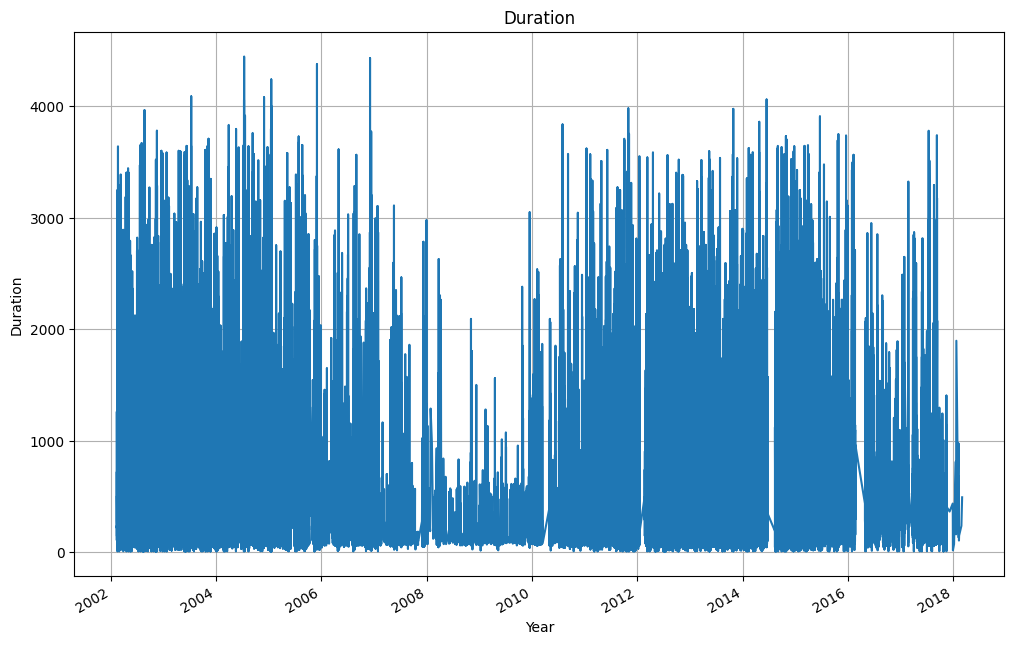

In [159]:
ax = df['duration.s'].plot(figsize=(12, 8))
ax.set(ylabel='Duration', xlabel='Year', title='Duration');
ax.grid()

Clean data

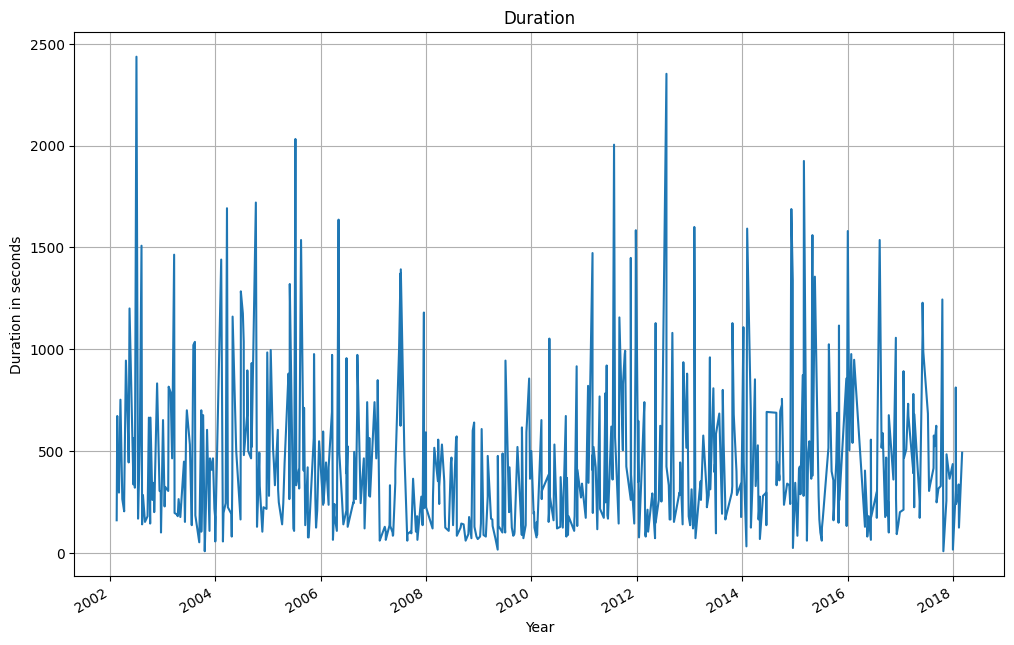

In [160]:
ax = annual_data['duration.s'].plot(figsize=(12, 8))
ax.set(ylabel='Duration in seconds', xlabel='Year', title='Duration');
ax.grid()

### 3.2 Energy

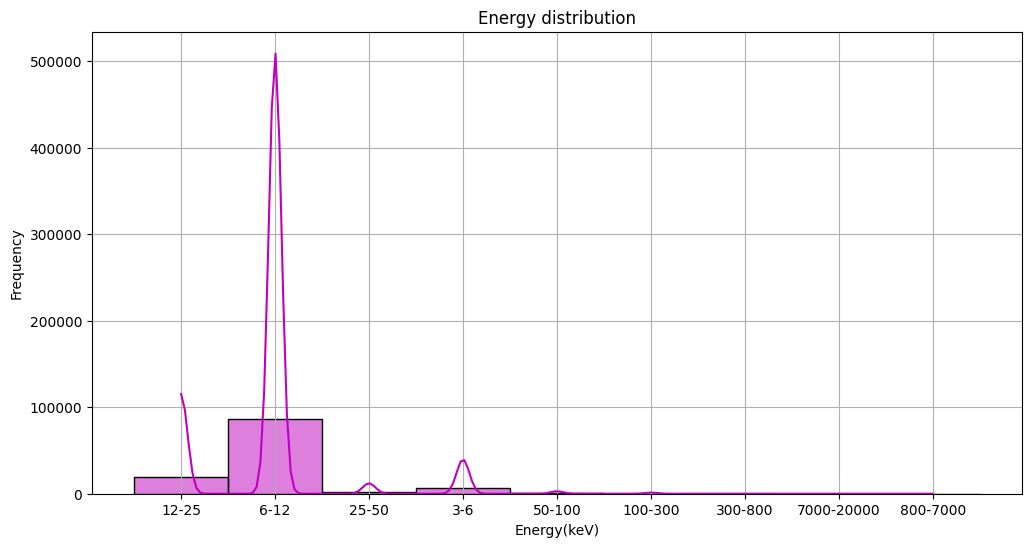

In [161]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['energy.kev'], bins=30, kde=True, color='m')
plt.title('Energy distribution')
plt.xlabel('Energy(keV)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

---

### 4.1 Seasonality Analysis

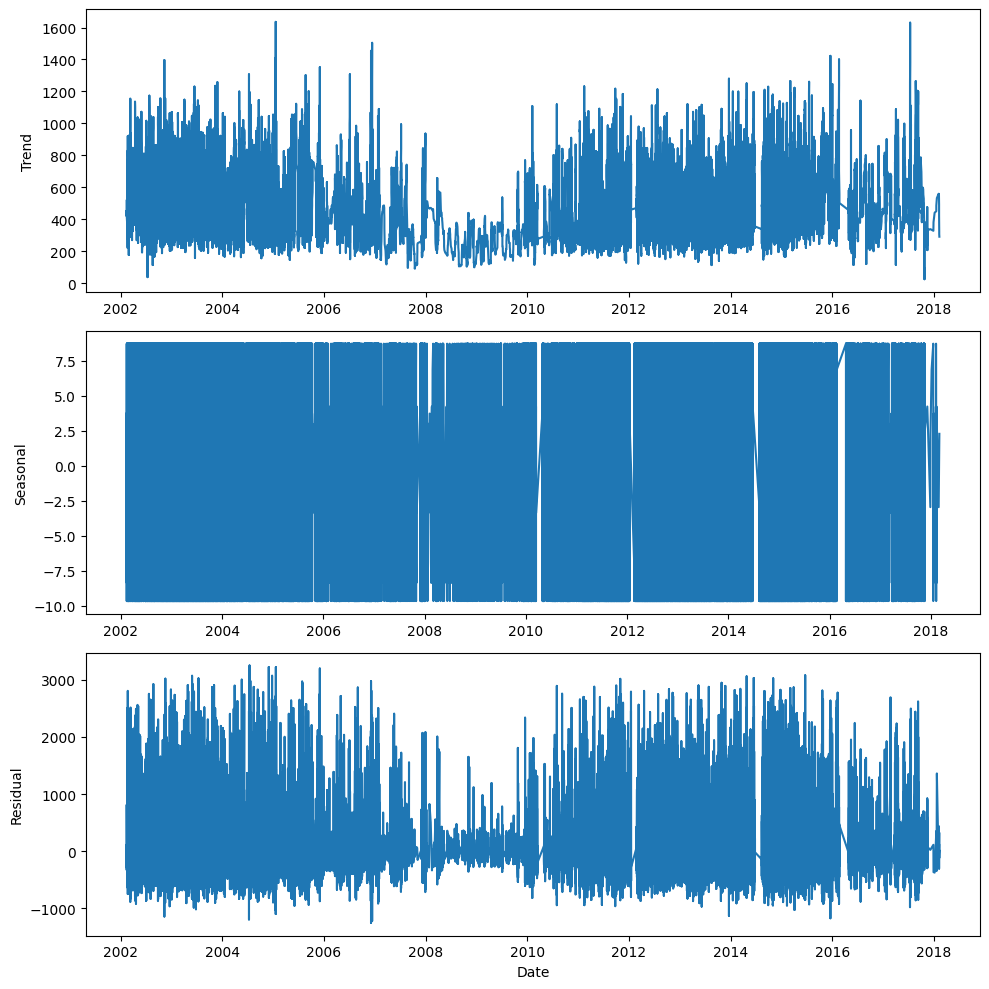

In [162]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['duration.s'], model='additive', period=12)
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

ax[0].plot(decomposition.trend)
ax[0].set_ylabel('Trend')

ax[1].plot(decomposition.seasonal)
ax[1].set_ylabel('Seasonal')

ax[2].plot(decomposition.resid)
ax[2].set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


When looking at the graphs we can observe an anomaly in the years 2008 to 2010. Let's dig deeper into each one:

#### Trend
In the trend graph we can observe considerable variability in the duration of the solar flares over time. No clear trend of increase or decrease can be seen. An even longer time scale may be needed.

#### Seasonal
The seasonal graph shows repetitive fluctuations, but the seasonality is not easily discernible due to the saturation and density of the data.

It is possible that by increasing the timeline by a few decades, a pattern can be observed.

#### Residual
The residual plot shows considerable variability and does not appear to have a clear pattern, suggesting the **presence of random noise** or variability not explained by the trend and seasonality components.

### Resampling
If we apply resampling by reducing the data points by averaging the months, we obtain more simplified, less saturated and possibly better understandable graphs.

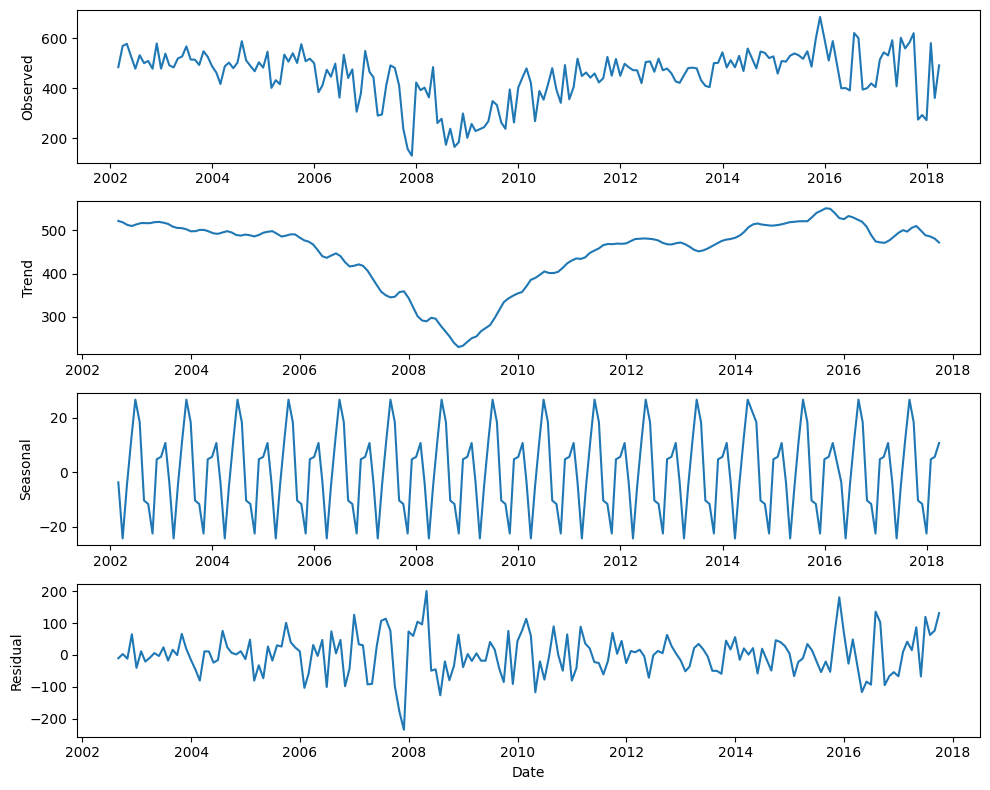

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Smooth the time series
df['smoothed_duration'] = df['duration.s'].rolling(window=12).mean()

# Resample the data at a lower frequency: M (monthly)
df_resampled = df['duration.s'].resample('M').mean()

# Perform decomposition on the resampled data
decomposition = seasonal_decompose(df_resampled.dropna(), model='additive', period=12)

fig, ax = plt.subplots(4, 1, figsize=(10, 8))

ax[0].plot(decomposition.observed)
ax[0].set_ylabel('Observed')

ax[1].plot(decomposition.trend)
ax[1].set_ylabel('Trend')

ax[2].plot(decomposition.seasonal)
ax[2].set_ylabel('Seasonal')

ax[3].plot(decomposition.resid)
ax[3].set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


Once the data is cleaned, we can obtain conclusions more clearly.

#### Trend
The trend shows a clear pattern of long-term variation.
* From 2002 to approximately 2010, the duration of solar flares shows a **decreasing trend**. 
* Starting in 2010, there is a **gradual increase** until around 2016, followed by a **slight decrease**.

This could be related to the 11-year solar cycle, which influences solar activity, although more data would be needed to confirm this.

The decrease until 2010 and the subsequent increase until 2016 could be related to phases of solar minimum and maximum.


#### Seasonality

The seasonal component shows an annual repetitive pattern. This pattern suggests that there are certain periods of the year where the duration of solar flares is consistently higher or lower.

The regularity of these oscillations confirms the presence of an annual seasonality in the duration of solar flares.

#### Residual

The residuals show the variations that are not explained by either the trend or seasonality. There are significant variations, especially around 2008, indicating events or fluctuations that could be the result of factors not considered in the model.

In [164]:

def plot_seasonal_data(data, column, period='quad_year', cmap='viridis', labels='', figsize=(10, 6), ax=None, **kw):
    """
    Plot seasonal data with customized periodicity.

    Parameters:
        data (DataFrame): The DataFrame containing the data to plot.
        column (str): The column name containing the data to plot.
        period (str, optional): The period of the data, can be 'year', 'quad_year', or 'day'. Defaults to 'quad_year'.
        cmap (str, optional): The color map to use for plotting. Defaults to 'viridis'.
        labels (str, optional): Custom labels for the plot. Defaults to ''.
        figsize (tuple, optional): The size of the figure (width, height) in inches. Defaults to (10, 6).
        ax (matplotlib Axes object or array of Axes objects, optional): The Axes object(s) to plot on. If None, a new figure and axes will be created. Defaults to None.
        **kw: Additional keyword arguments to pass to the seaborn lineplot function.

    Returns:
        matplotlib Axes object or array of Axes objects: The Axes object(s) containing the plot.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    elif isinstance(ax, np.ndarray):
        # If ax is an ndarray of Axes objects, iterate over them
        fig = ax[0].figure
    else:
        fig = ax.figure

    # Extracting period and x values
    if period.lower() in ('year', 'y'):
        data['__period'] = data.index.year
        data['__x'] = data.index.dayofyear
        x_label = 'Day of Year'
    elif period.lower() in ('quad_year', 'q'):
        data['__period'] = (data.index.year // 4) * 4
        data['__x'] = data.index.dayofyear + (data.index.year % 4) * 365
        x_label = 'Day of Quad Year'
    elif period.lower() in ('day', 'd'):
        data['__period'] = data.index.date
        data['__x'] = data.index.hour + data.index.minute / 60 + data.index.second / 3600
        x_label = 'Hour of Day'
    else:
        raise ValueError("Period must be 'year', 'quad_year', or 'day'.")

    # Plotting
    if isinstance(ax, np.ndarray):
        # If ax is an ndarray of Axes objects, iterate over them and plot
        for idx, axes in enumerate(ax.flat):
            sns.lineplot(data=data[data['__period'] == data['__period'].unique()[idx]], x='__x', y=column, hue='__period', palette=cmap, ax=axes, **kw)
            axes.set(xlabel=x_label, ylabel=labels or column.replace('_', ' ').capitalize())
            axes.grid()
            axes.legend(title=period.capitalize())
    else:
        # If ax is a single Axes object, plot on it
        sns.lineplot(data=data, x='__x', y=column, hue='__period', palette=cmap, ax=ax, **kw)
        ax.set(xlabel=x_label, ylabel=labels or column.replace('_', ' ').capitalize())
        ax.grid()
        ax.legend(title=period.capitalize())

    return ax

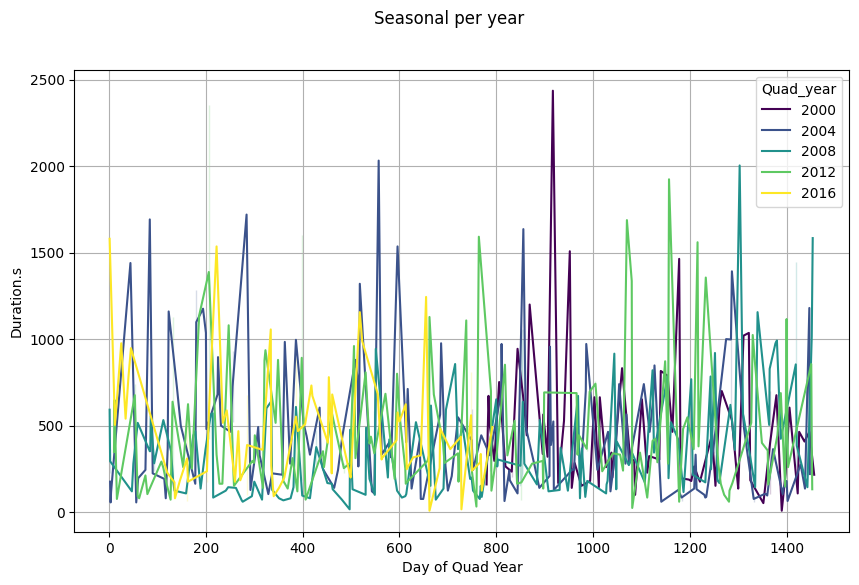

In [165]:
# Call the spider_plot function
plot_seasonal_data(annual_data, column='duration.s', period='quad_year')
plt.suptitle('Seasonal per year');
plt.show()

#### ANALYSIS

In [166]:
def spider_plot(data, column, period='year', cmap='viridis', figsize=(10, 6), ax=None, **kw):
    """
    Plot a spider plot showing trends over a specified period.

    Parameters:
        data (DataFrame): The DataFrame containing the data to plot.
        column (str): The column name containing the data to plot.
        period (str, optional): The period of the data, can be 'year', 'quad_year', or 'day'. Defaults to 'year'.
        cmap (str, optional): The color map to use for plotting. Defaults to 'viridis'.
        figsize (tuple, optional): The size of the figure (width, height) in inches. Defaults to (10, 6).
        ax (matplotlib Axes object, optional): The Axes object to plot on. If None, a new figure and axes will be created. Defaults to None.
        **kw: Additional keyword arguments to pass to the plotting function.

    Returns:
        matplotlib Axes object: The Axes object containing the plot.
    """
    # Ensure the index is a DatetimeIndex
    if not isinstance(data.index, pd.DatetimeIndex):
        data.index = pd.to_datetime(data.index, errors='coerce')  # Coerce invalid dates to NaT
    
    if data.index.isna().any():
        raise ValueError("The DataFrame index contains non-datetime values that cannot be converted.")
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))
    else:
        fig, ax = ax.figure, ax

    # Extracting period and x values
    if period.lower() in ('year', 'y'):
        data['__period'] = data.index.year
        data['__x'] = data.index.dayofyear
        num_ticks = 12
        tick_labels = [calendar.month_abbr[i+1] for i in range(12)]
    elif period.lower() in ('quad_year', 'q'):
        data['__period'] = (data.index.year // 4) * 4
        data['__x'] = data.index.dayofyear + (data.index.year % 4) * 365
        num_ticks = 4
        tick_labels = [f'Year {(i//365) + 1}' for i in range(0, 4 * 365, 365)]
    elif period.lower() in ('day', 'd'):
        data['__period'] = data.index.date
        data['__x'] = data.index.hour + data.index.minute / 60 + data.index.second / 3600
        num_ticks = 24
        tick_labels = [f'{i}:00' for i in range(24)]
    else:
        raise ValueError("Period must be 'year', 'quad_year', or 'day'.")

    # Plotting spider plot
    cm = plt.get_cmap(cmap)
    periods = data['__period'].unique()
    num_periods = len(periods)
    for i, p in enumerate(periods):
        color = cm(i / num_periods)
        period_data = data[data['__period'] == p]
        if period_data.empty:
            continue
        values = period_data[column].values
        angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False)
        values = np.concatenate((values, [values[0]]))  # Close the plot
        angles = np.concatenate((angles, [angles[0]]))  # Close the plot
        ax.plot(angles, values, label=str(p), color=color, **kw)
        ax.fill(angles, values, color=color, alpha=0.25)

    # Adding radial lines for the ticks
    angles_ticks = np.linspace(0, 2 * np.pi, num_ticks, endpoint=False)
    ax.set_xticks(angles_ticks)
    ax.set_xticklabels(tick_labels)

    # Adding labels and title
    ax.set_rlabel_position(90)
    ax.set_rticks([])  # Hide radial ticks
    ax.set_rmax(data[column].max())
    ax.legend(title=period.capitalize(), bbox_to_anchor=(1.1, 1.1), loc='upper left')

    return ax

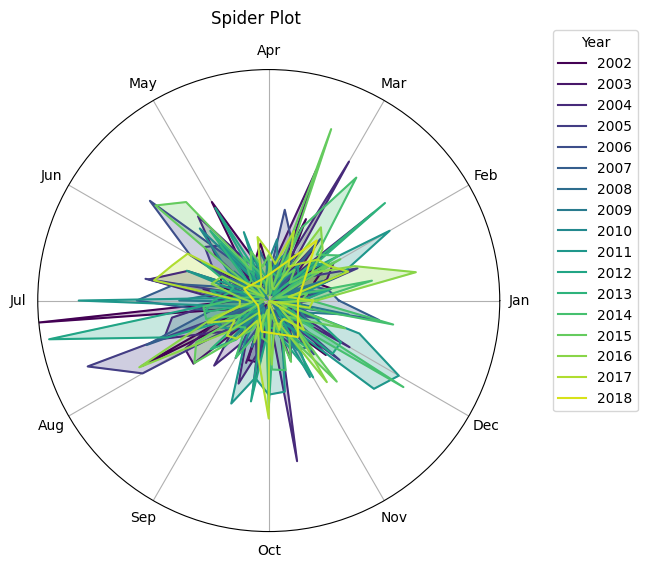

In [167]:
# Call the spider_plot function
spider_plot(annual_data, column='duration.s', period='year')
plt.suptitle('Spider Plot');
plt.show()

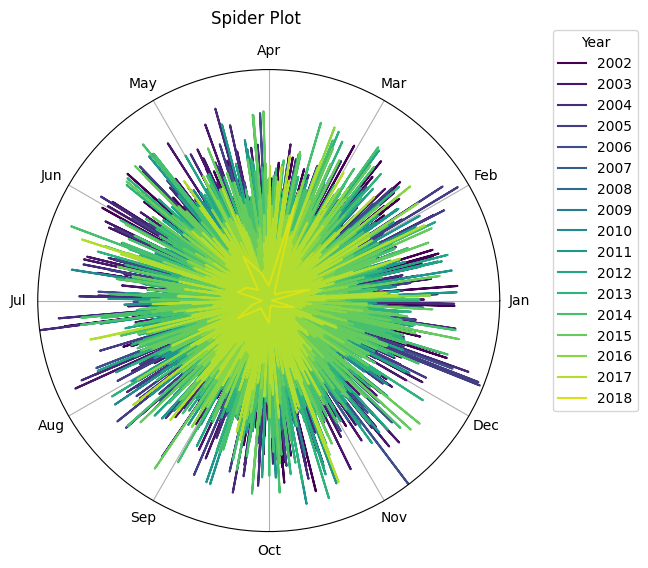

In [168]:
# Call the spider_plot function
spider_plot(df, column='duration.s', period='year')
plt.suptitle('Spider Plot');
plt.show()

----

### Analysis ENERGY of the flares

Now we are going to analyze the energy released by solar flares.

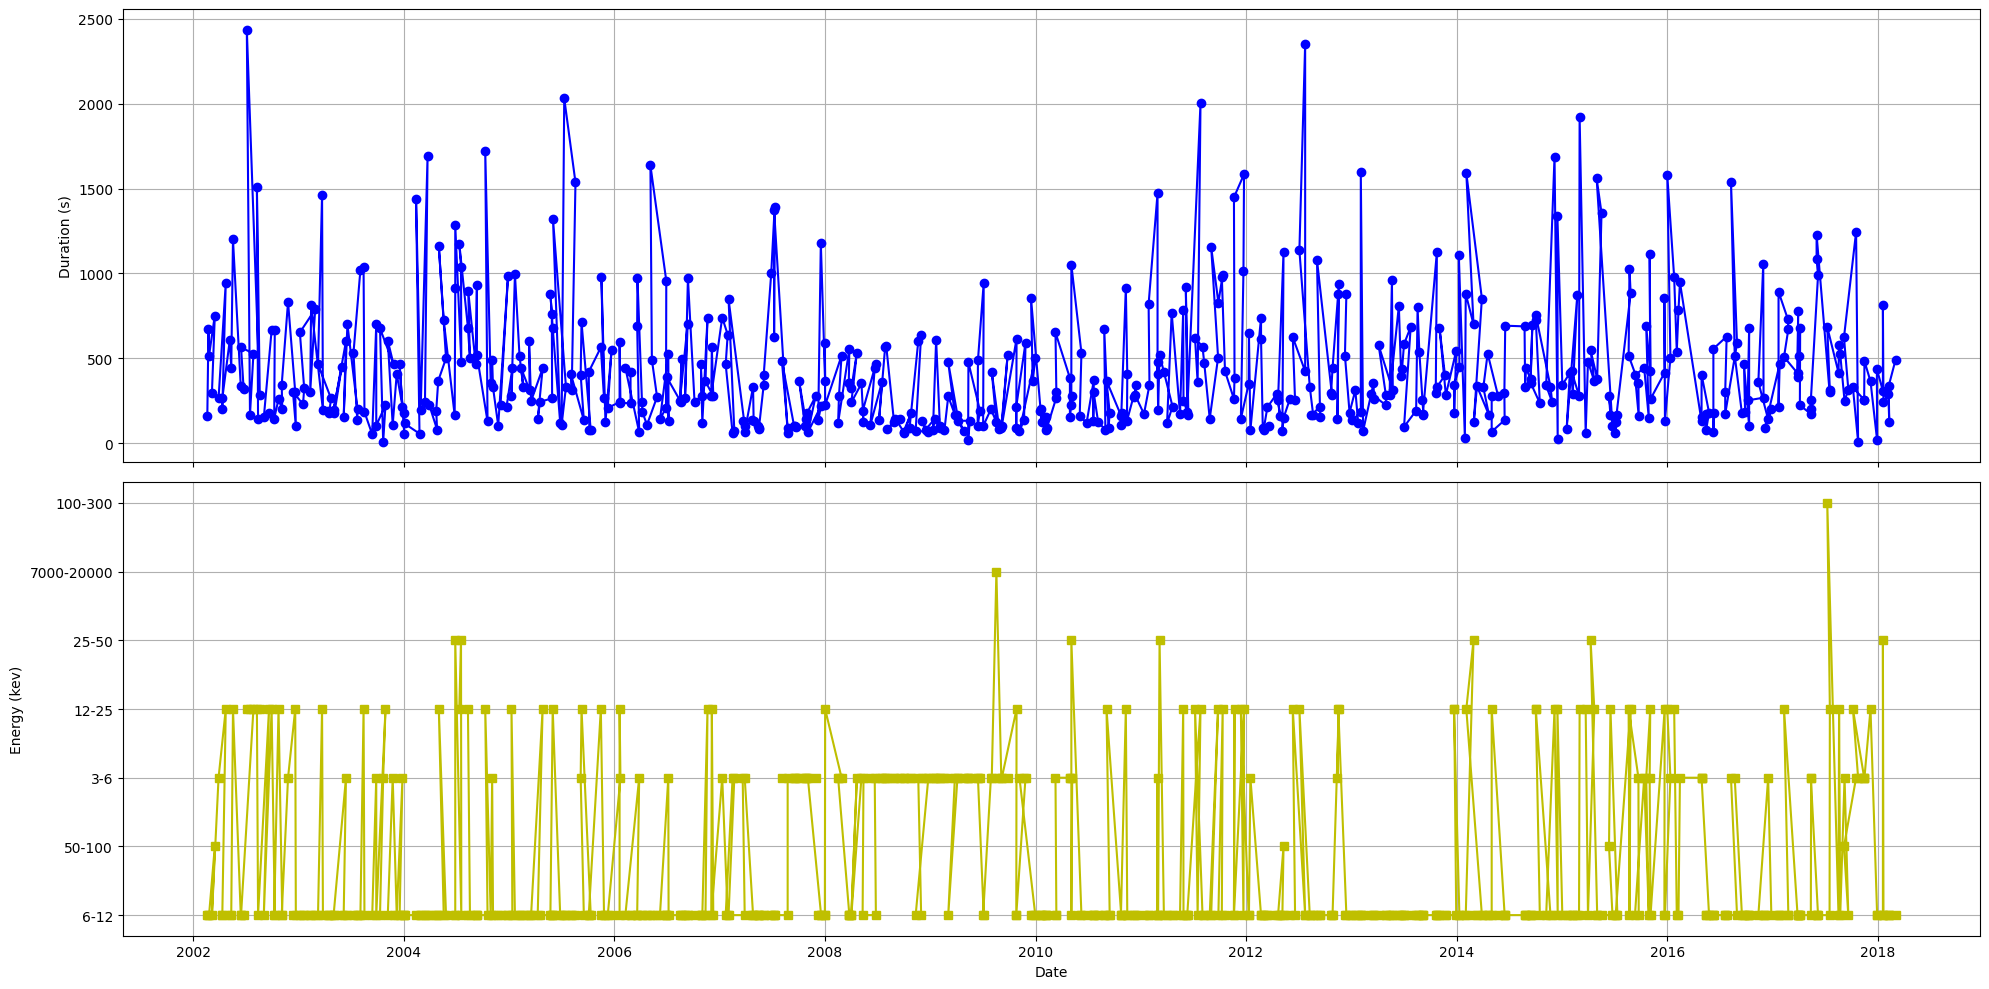

In [169]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'annual_data' with columns 'duration.s' and 'energy.kev'
# Make sure your data is loaded correctly before plotting

fig, axs = plt.subplots(2, sharex=True, figsize=(20, 10))

# Duration plot
ax = axs[0]
ax.plot(annual_data.index, annual_data['duration.s'], color='blue', marker='o')  # Adjust data and line style according to your needs
ax.set(xlabel='', ylabel='Duration (s)')
ax.grid()

# Energy plot
ax = axs[1]
ax.plot(annual_data.index, annual_data['energy.kev'], color='y', marker='s')  # Adjust data and line style according to your needs
ax.set(xlabel='Date', ylabel='Energy (kev)')
ax.grid()

plt.tight_layout()  # Automatically adjusts spacing between subplots
plt.show()


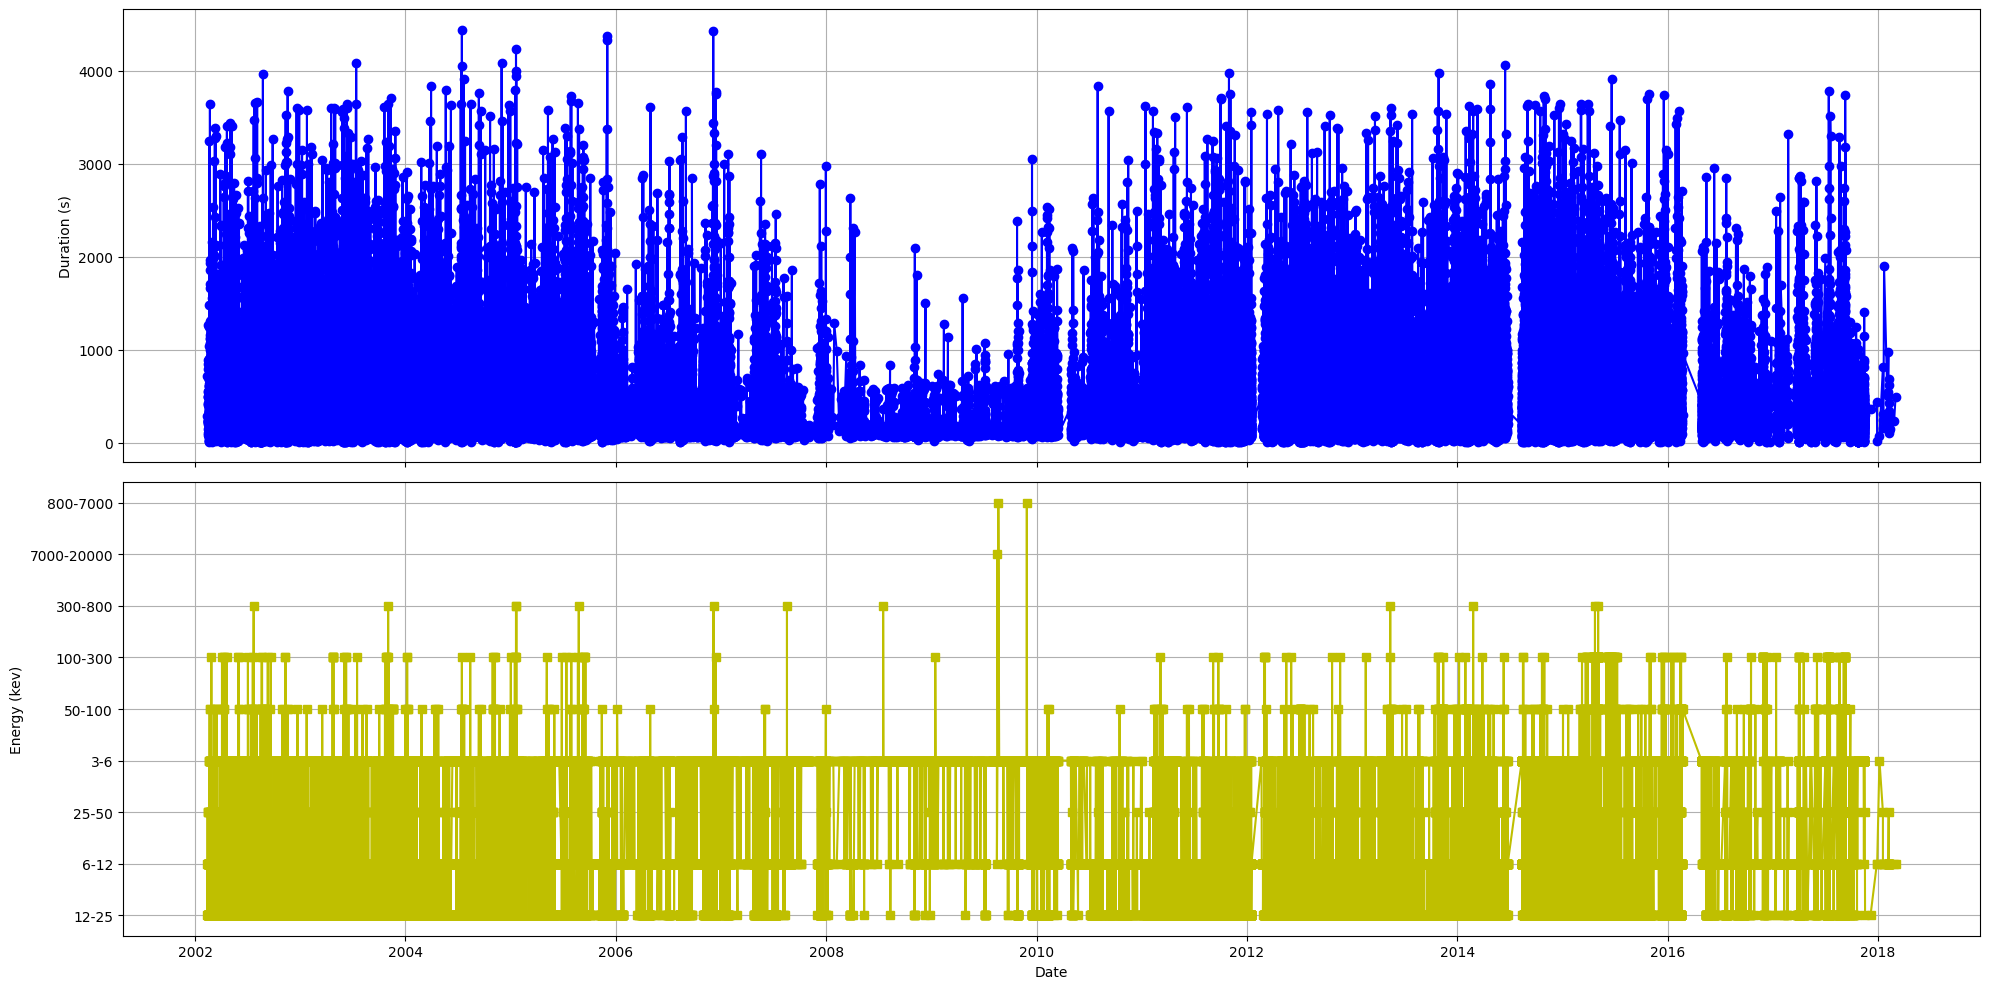

In [170]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'duration.s' and 'energy.kev'
# Make sure your data is loaded correctly before plotting

fig, axs = plt.subplots(2, sharex=True, figsize=(20, 10))

# Duration plot
ax = axs[0]
ax.plot(df.index, df['duration.s'], color='blue', marker='o')  # Adjust data and line style according to your needs
ax.set(xlabel='', ylabel='Duration (s)')
ax.grid()

# Energy plot
ax = axs[1]
ax.plot(df.index, df['energy.kev'], color='y', marker='s')  # Adjust data and line style according to your needs
ax.set(xlabel='Date', ylabel='Energy (kev)')
ax.grid()

plt.tight_layout()  # Automatically adjusts spacing between subplots
plt.show()


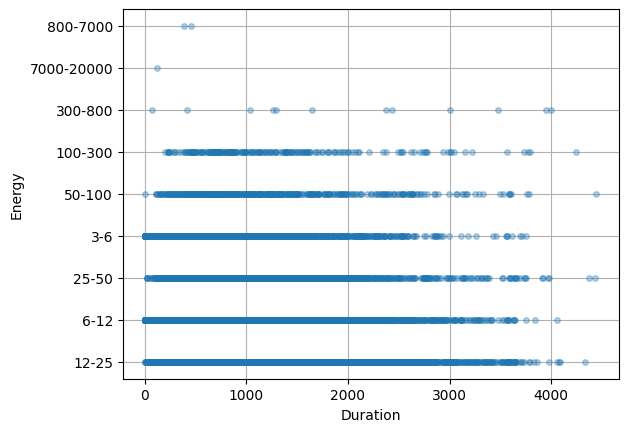

In [171]:
fig, ax = plt.subplots()
ax.plot(df['duration.s'], df['energy.kev'], '.', alpha=.33, ms=8)
ax.set(xlabel='Duration', ylabel='Energy')
ax.grid()

Most events are clustered at the bottom of the graph, indicating that most eruptions have low energies and short durations. However, there are some high-energy events that do not necessarily last much longer than low-energy events.

### Total counts of solar flares vs duration [TOTAL.COUNTS VS DURATION.S]

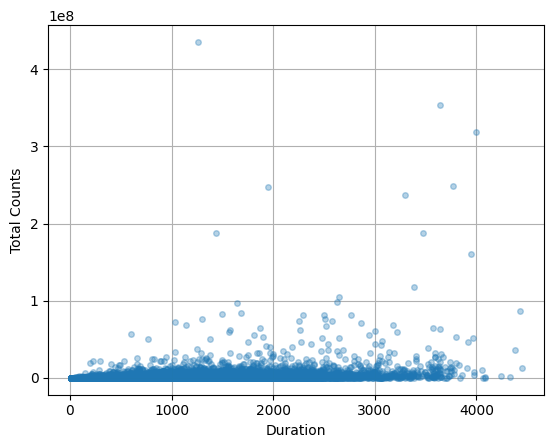

In [172]:
fig, ax = plt.subplots()
ax.plot(df['duration.s'], df['total.counts'], '.', alpha=.33, ms=8)
ax.set(xlabel='Duration', ylabel='Total Counts')
ax.grid()

The general trend is that as the duration of solar flares increases, so does the total number of counts. This suggests a direct relationship between duration and total number of counts.

### HeatMap

Create the **joint distribution heatmap** and **histograms**

<Figure size 1000x800 with 0 Axes>

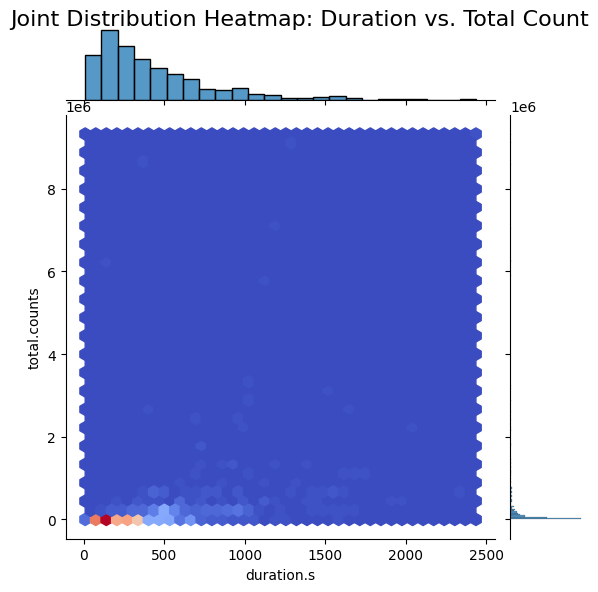

In [173]:
plt.figure(figsize=(10, 8))
data = annual_data[['duration.s', 'total.counts']]
sns.jointplot(x='duration.s', y='total.counts', data=data, kind='hex', cmap='coolwarm')
plt.subplots_adjust(top=0.95)
plt.suptitle('Joint Distribution Heatmap: Duration vs. Total Count', fontsize=16)
plt.show()


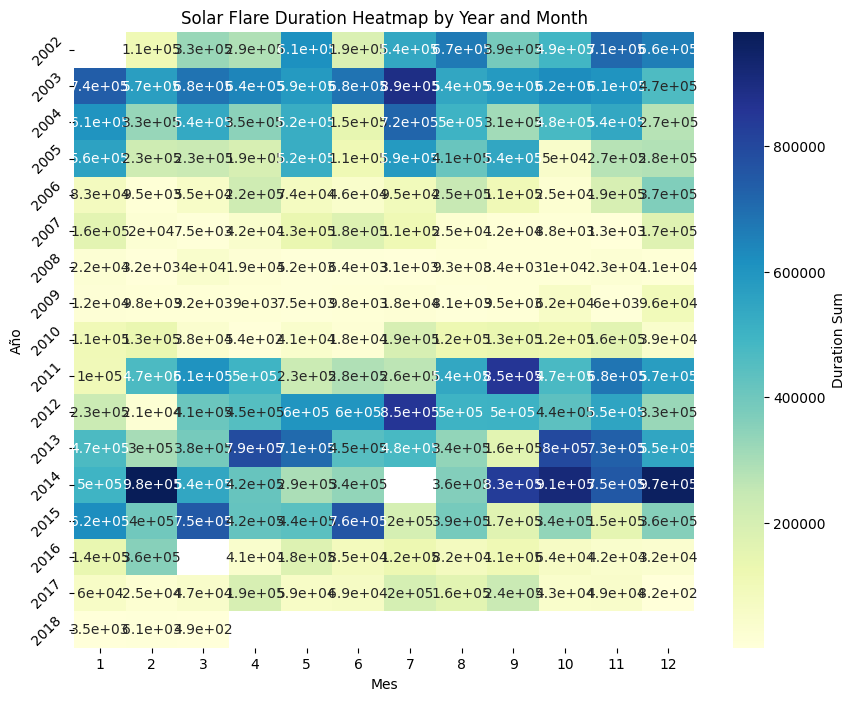

In [174]:
df['year'] = df.index.year
df['month'] = df.index.month

# We group the data by year and month, and calculate the sum of 'duration.s' and 'total.counts' for each group
flare_month_year = df.groupby(['year', 'month'])[['duration.s', 'total.counts']].sum()

# We reset the index of the clustered DataFrame and pivot it to create a new DataFrame structure
# where each row represents a year and each column represents a month, 
# with 'duration.s' and 'total.counts' summed in the corresponding cells
flare_heatmap = flare_month_year.reset_index().pivot(index='year', columns='month', values='duration.s')

plt.figure(figsize=(10, 8))
sns.heatmap(flare_heatmap, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Duration Sum'})

plt.title('Solar Flare Duration Heatmap by Year and Month')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.yticks(rotation=45)

plt.show()


### Lag

Lag in this context refers to previous observations of a variable, in your case you might consider previous observations of duration.s and total.counts.

Each point on the chart represents a pair of values. For example, a specific point on the chart can represent the value pair (Original duration.s, Lag 1 duration.s) or (Original total.counts, Lag 1 total.counts) for a particular day.

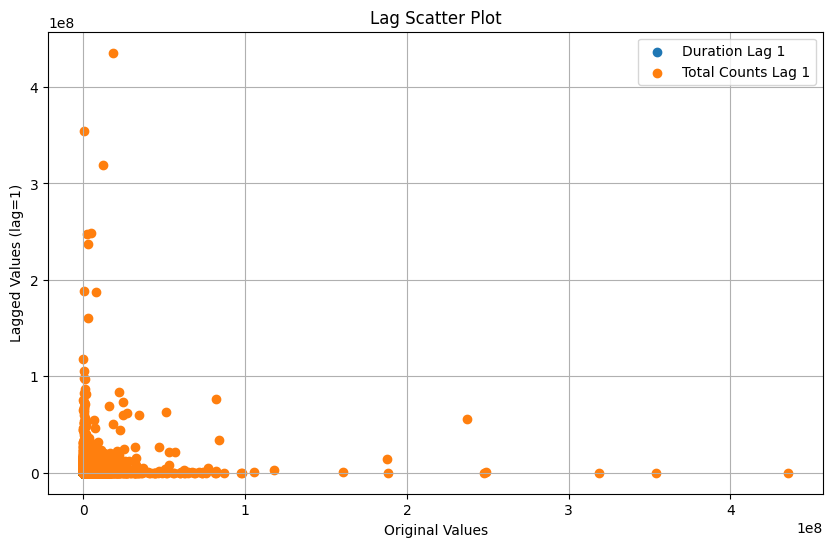

            Original duration.s  Lag 1 duration.s  Original total.counts  \
start.date                                                                 
2002-02-12                  288             712.0                 9504.0   
2002-02-13                  216             288.0                11448.0   
2002-02-13                  244             216.0                17400.0   
2002-02-13                  236             244.0               313392.0   
2002-02-13                  788             236.0               524304.0   
...                         ...               ...                    ...   
2018-02-09                  124             428.0                 2888.0   
2018-02-09                  104             124.0                 1656.0   
2018-02-10                  148             104.0                 2224.0   
2018-02-26                  236             148.0                 3312.0   
2018-03-03                  492             236.0                15816.0   

           

In [175]:

# We add a column 'lag_duration.s' and 'lag_total.counts' to calculate the lags of these variables
df['lag_duration.s'] = df['duration.s'].shift(1)  # Lag 1 de 'duration.s'
df['lag_total.counts'] = df['total.counts'].shift(1)  # Lag 1 de 'total.counts'

# Create a DataFrame with the original variables and their offset values
lag_df = pd.DataFrame({
    'Original duration.s': df['duration.s'],
    'Lag 1 duration.s': df['lag_duration.s'],
    'Original total.counts': df['total.counts'],
    'Lag 1 total.counts': df['lag_total.counts']
})

lag_df = lag_df.dropna()

# Create a scatter plot to visualize the lag
plt.figure(figsize=(10, 6))
plt.scatter(lag_df['Original duration.s'], lag_df['Lag 1 duration.s'], label='Duration Lag 1')
plt.scatter(lag_df['Original total.counts'], lag_df['Lag 1 total.counts'], label='Total Counts Lag 1')
plt.xlabel('Original Values')
plt.ylabel('Lagged Values (lag=1)')
plt.title('Lag Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

print(lag_df)


As we can see, the points line up on each of the diagonal lines, from the bottom left corner to the top right. This indicates a positive correlation between the original variables and their lagged values (lag=1).

This means that the values of the variables **duration.s** and **total.counts** tend to follow a similar trend the next day.

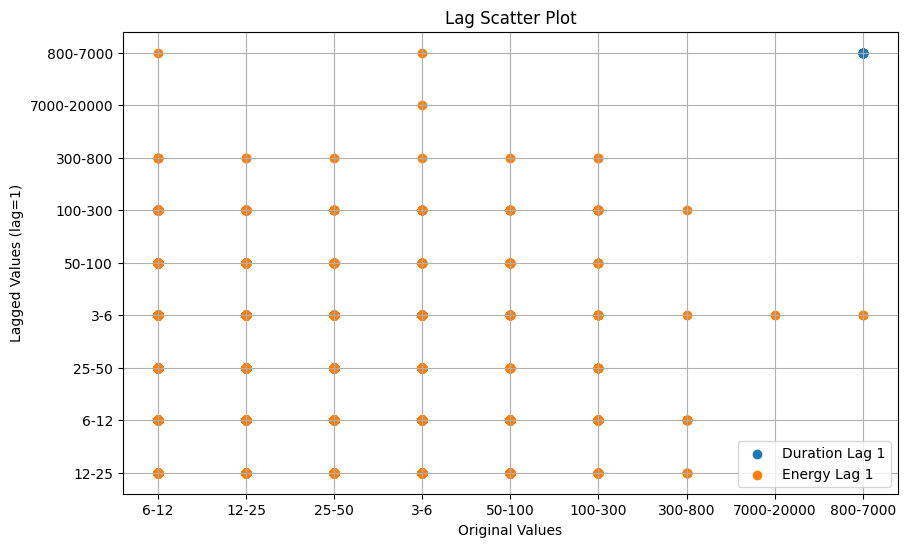

            Original duration.s  Lag 1 duration.s Original energy Lag 1 energy
start.date                                                                    
2002-02-12                  288             712.0            6-12        12-25
2002-02-13                  216             288.0            6-12         6-12
2002-02-13                  244             216.0           12-25         6-12
2002-02-13                  236             244.0           25-50        12-25
2002-02-13                  788             236.0           12-25        25-50
...                         ...               ...             ...          ...
2018-02-09                  124             428.0            6-12         6-12
2018-02-09                  104             124.0            6-12         6-12
2018-02-10                  148             104.0            6-12         6-12
2018-02-26                  236             148.0            6-12         6-12
2018-03-03                  492             236.0   

In [176]:

# We add a column 'lag_duration.s' and 'lag_total.counts' to calculate the lags of these variables
df['lag_energy'] = df['energy.kev'].shift(1)  # Lag 1 de 'energy'

# Create a DataFrame with the original variables and their offset values
lag_df = pd.DataFrame({
    'Original duration.s': df['duration.s'],
    'Lag 1 duration.s': df['lag_duration.s'],
    'Original energy': df['energy.kev'],
    'Lag 1 energy': df['lag_energy']
})

lag_df = lag_df.dropna()

# Create a scatter plot to visualize the lag
plt.figure(figsize=(10, 6))
plt.scatter(lag_df['Original duration.s'], lag_df['Lag 1 duration.s'], label='Duration Lag 1')
plt.scatter(lag_df['Original energy'], lag_df['Lag 1 energy'], label='Energy Lag 1')
plt.xlabel('Original Values')
plt.ylabel('Lagged Values (lag=1)')
plt.title('Lag Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

print(lag_df)


On the other hand, we see that the points are scattered and do not show a clear alignment. This suggests that there is no strong correlation between the original and the outdated values. This could indicate that solar flares have random variations in their **duration** and **energy**.

### Autocorrelation

<Figure size 1200x600 with 0 Axes>

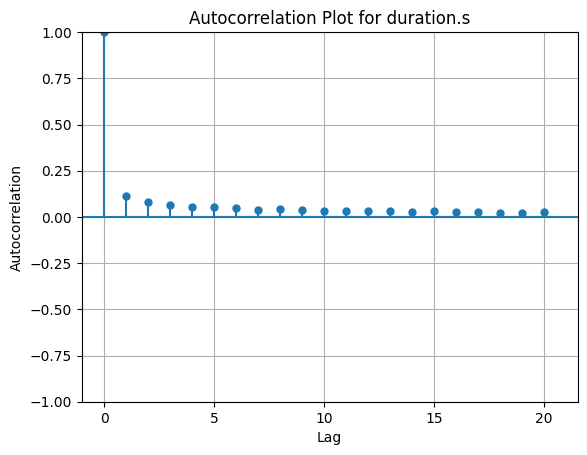

In [177]:
plt.figure(figsize=(12, 6))
plot_acf(df['duration.s'], lags=20, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot for duration.s')
plt.grid(True)
plt.show()

As we can see, we have an initial high point followed by a gradual decay for duration.s. This suggests that the time series exhibits a strong positive autocorrelation in the short term, but this dependence decreases as we look at more distant time periods.

Understanding autocorrelation helps in time series modeling and prediction. For example, an ARIMA model could take advantage of this autocorrelation to forecast future values ​​of duration.s based on its own history.

<Figure size 1200x600 with 0 Axes>

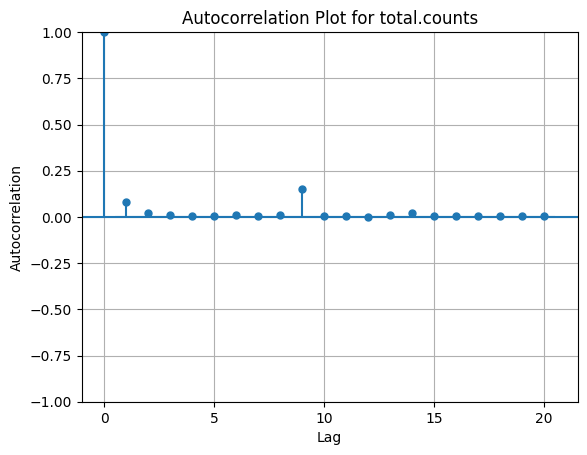

In [178]:
plt.figure(figsize=(12, 6))
plot_acf(df['total.counts'], lags=20, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot for total.counts')
plt.grid(True)
plt.show()

In this chart we can see minimal ripples that may indicate seasonal or cyclical components in the data. They could suggest that certain patterns of behavior repeat at regular intervals within the total.counts data.

We also see an anomaly at x=9. A value of y=0.20 indicates a mild autocorrelation at that specific lag. This type of anomaly could be a point of interest for further investigation:
* It could indicate an extraordinary event in the past that significantly affected future values ​​of total.counts.
* It could also be an artifact of the data that requires further examination to determine its origin and validity.

In [179]:
def calcular_media(rango):
    min_val, max_val = map(int, rango.split('-'))
    return (min_val + max_val) / 2

df['energy_mean'] = df['energy.kev'].apply(calcular_media)


In [180]:
df['energy_mean']

start.date
2002-02-12    18.5
2002-02-12     9.0
2002-02-13     9.0
2002-02-13    18.5
2002-02-13    37.5
              ... 
2018-02-09     9.0
2018-02-09     9.0
2018-02-10     9.0
2018-02-26     9.0
2018-03-03     9.0
Name: energy_mean, Length: 116143, dtype: float64

<Figure size 1200x600 with 0 Axes>

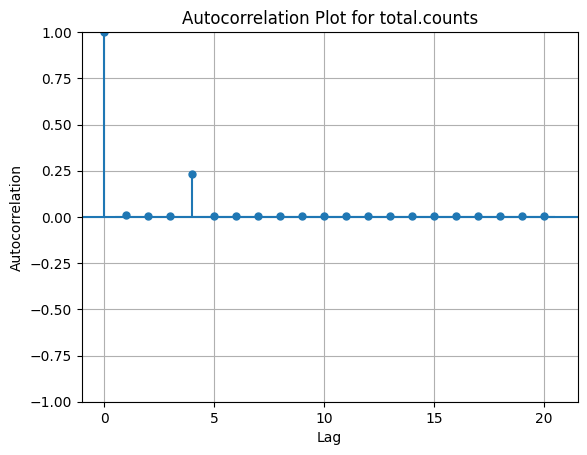

In [181]:
plt.figure(figsize=(12, 6))
plot_acf(df['energy_mean'], lags=20, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot for total.counts')
plt.grid(True)
plt.show()

We can see a situation similar to the previous graph but without the ripple patterns.

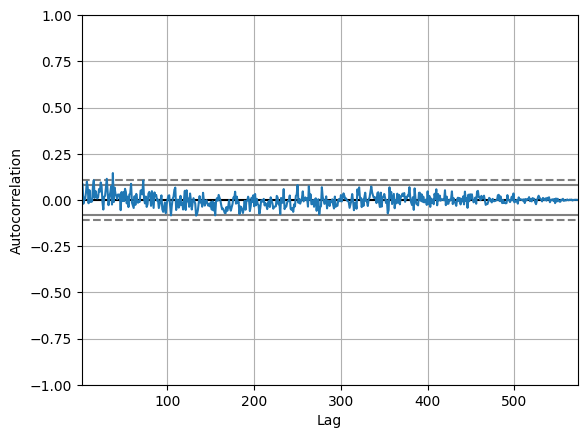

In [182]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot

# autocorrelation plot
autocorrelation_plot(annual_data['duration.s'])
plt.show()

We can see in the autocorrelation a small upward trend (x=0 to x=150) which could mean a high correlation with its previous values.

After x=150 we see a downward trend which could mean a new periodicity or pattern in the data.

---

---

# PREDICTIONS

In [183]:
annual_data

,flare,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5,__period,__x
start.date,,,,,,,,,,,,,,,,,,,
2002-02-19,2021916,16:31:00,16:31:42,16:33:40,160,136,16512.0,6-12,-42,-196,200,0,A1,P1,NaN,NaN,NaN,2002,50
2002-02-23,2022381,23:05:16,23:09:10,23:16:28,672,30,70296.0,6-12,714,-204,742,9830,A1,P1,NaN,NaN,NaN,2002,54
2002-02-25,2022554,18:14:24,18:18:02,18:23:00,516,20,33144.0,6-12,772,43,774,9846,A1,P1,NaN,NaN,NaN,2002,56
2002-03-17,2031701,10:08:40,10:17:42,10:21:12,752,1328,1835976.0,50-100,-347,-237,420,0,A1,EE,P1,Q1,NaN,2002,76
2002-03-07,2030745,07:09:16,07:10:10,07:14:12,296,216,337152.0,6-12,-999,-121,1006,9866,A0,P1,NaN,NaN,NaN,2002,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-20,18012002,04:53:28,04:54:30,04:57:28,240,16,5608.0,6-12,499,-115,512,2696,A0,P1,PE,Q1,NaN,2018,20
2018-02-06,18020602,19:04:20,19:05:30,19:09:08,288,13,5544.0,6-12,-845,-35,845,2699,A0,DF,P1,PE,Q2,2018,37
2018-02-09,18020903,16:41:28,16:42:54,16:43:32,124,18,2888.0,6-12,-345,-38,347,2699,A0,DF,P1,PE,Q2,2018,40


* TSMean 
* TSNaiv
* TSNaiveSeasonal
* TSDrift


In [184]:
class TSMean:
    def __init__(self, series):
        self.mean = series.mean()

    def forecast(self, steps):
        return [self.mean] * steps

class TSNaive:
    def __init__(self, series):
        self.last_value = series.iloc[-1]

    def fit(self):
        return self

    def forecast(self, steps):
        return [self.last_value] * steps

class TSNaiveSeasonal:
    def __init__(self, series, period):
        self.period = period
        self.values = series.values

    def forecast(self, steps):
        seasonal_forecast = []
        for i in range(steps):
            index = len(self.values) - (i % self.period) - 1
            seasonal_forecast.append(self.values[index])
        return seasonal_forecast[::-1]

class TSDrift:
    def __init__(self, series):
        self.x_start = 0
        self.x_end = len(series) - 1
        self.y_start = series.iloc[0]
        self.y_end = series.iloc[-1]
        self.slope = (self.y_end - self.y_start) / (self.x_end - self.x_start)
        self.intercept = self.y_start - self.slope * self.x_start

    def forecast(self, steps):
        forecast_values = [self.intercept + self.slope * (self.x_end + i) for i in range(1, steps + 1)]
        return forecast_values

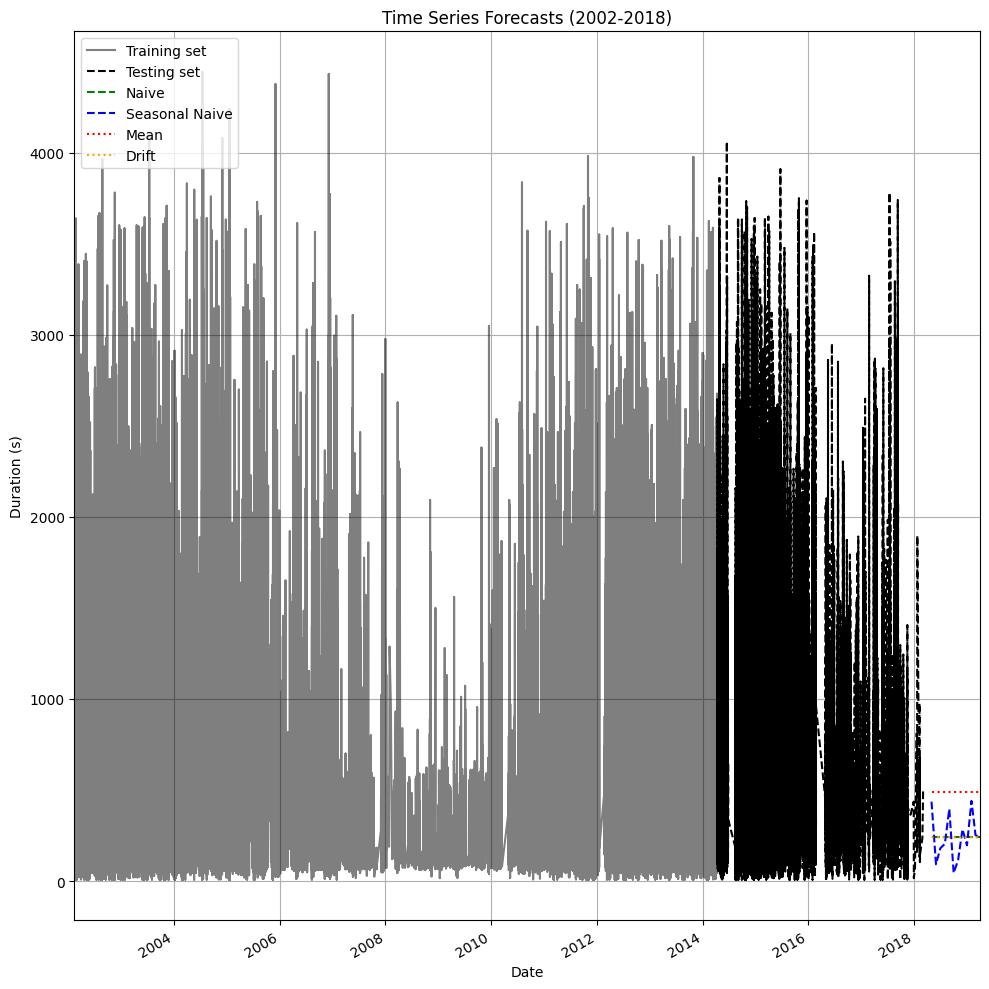

In [185]:
# Assuming annual_data is already loaded and contains data from 2002 to 2018
total_rows = len(df)
train_size = int(0.8 * total_rows)

# Divide the data into Train and Test
Train = df.iloc[:train_size]['duration.s']
Test = df.iloc[train_size:]['duration.s']
MONTHS = 12

# Fit the models
m = TSMean(Train)
n = TSNaive(Train).fit()
s = TSNaiveSeasonal(Train, MONTHS)
dr = TSDrift(Train)

# Generate forecasts
forecast_naive = n.forecast(MONTHS)
forecast_seasonal = s.forecast(MONTHS)
forecast_mean = m.forecast(MONTHS)
forecast_drift = dr.forecast(MONTHS)

# Generate dates for the forecasts
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=MONTHS, freq='M')

# Create forecast series with correct dates
forecast_naive_series = pd.Series(forecast_naive, index=forecast_dates)
forecast_seasonal_series = pd.Series(forecast_seasonal, index=forecast_dates)
forecast_mean_series = pd.Series(forecast_mean, index=forecast_dates)
forecast_drift_series = pd.Series(forecast_drift, index=forecast_dates)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the entire training set
ax.plot(Train.index, Train, 'k', label='Training set', alpha=0.5)
ax.plot(Test.index, Test, 'k', linestyle='--', label='Testing set')

# Plot forecasts
ax.plot(forecast_naive_series.index, forecast_naive_series, color='green', label='Naive', linestyle='--')
ax.plot(forecast_seasonal_series.index, forecast_seasonal_series, color='blue', label='Seasonal Naive', linestyle='--')
ax.plot(forecast_mean_series.index, forecast_mean_series, color='red', label='Mean', linestyle='dotted')
ax.plot(forecast_drift_series.index, forecast_drift_series, color='orange', label='Drift', linestyle=':')

ax.legend(loc='upper left')
ax.grid(True)

# Set x-axis limits to show all data
ax.set_xlim(df.index[0], forecast_dates[-1])

plt.title('Time Series Forecasts (2002-2018)')
plt.xlabel('Date')
plt.ylabel('Duration (s)')

# Adjust x-axis date format
plt.gcf().autofmt_xdate()  # Rotate and format date labels

plt.tight_layout()
plt.show()


### verification
As we can see in our data, the prediction follows the downward trend. To corroborate this, we can compare with other graphs on the internet where similar studies have been conducted. In this graph, we can see how the pattern repeats approximately every 12 years.

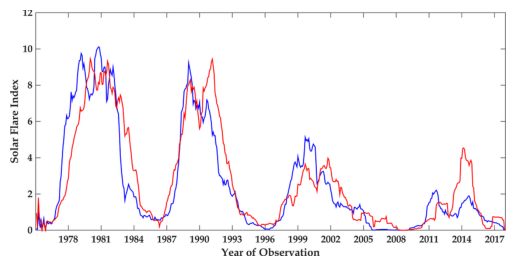

In [186]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('graphic.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [187]:
total_rows

116143

In [188]:
Train

start.date
2002-02-12    712
2002-02-12    288
2002-02-13    216
2002-02-13    244
2002-02-13    236
             ... 
2014-04-11    284
2014-04-11    196
2014-04-11    440
2014-04-11    252
2014-04-11    240
Name: duration.s, Length: 92914, dtype: int64

In [189]:
Test

start.date
2014-04-11    184
2014-04-11    484
2014-04-11    400
2014-04-11    568
2014-04-11    380
             ... 
2018-02-09    124
2018-02-09    104
2018-02-10    148
2018-02-26    236
2018-03-03    492
Name: duration.s, Length: 23229, dtype: int64

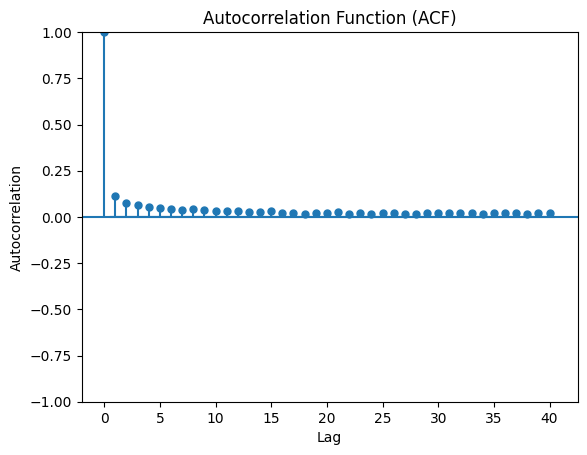

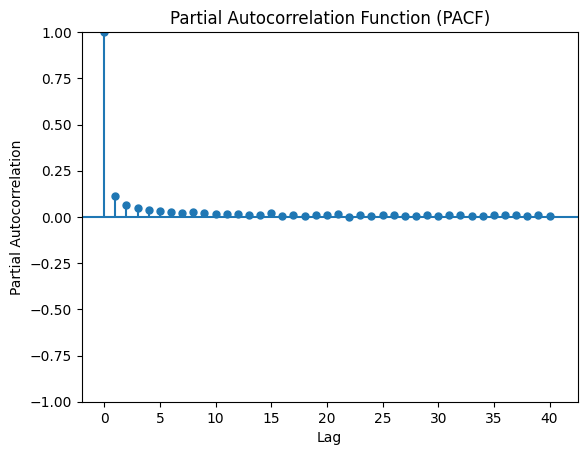

In [190]:
# Plot ACF
plot_acf(Train, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plot_pacf(Train, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [191]:
# Print information about the data
print('Observations: {}'.format(len(df)))
print('Training Observations: {}'.format(len(Train)))
print('Testing Observations: {}'.format(len(Test)))

Observations: 116143
Training Observations: 92914
Testing Observations: 23229


### Prediction models

In [192]:
def calculate_metrics(true_values, forecasted_values):
    true_values = true_values[:len(forecasted_values)]  
    rmse = np.sqrt(mean_squared_error(true_values, forecasted_values))
    mae = mean_absolute_error(true_values, forecasted_values)
    mape = np.mean(np.abs((true_values - forecasted_values) / true_values)) * 100
    return [rmse, mae, mape]

In [193]:

naive_metrics = calculate_metrics(Test, forecast_naive)
seasonal_metrics = calculate_metrics(Test, forecast_seasonal)
mean_metrics = calculate_metrics(Test, forecast_mean)
drift_metrics = calculate_metrics(Test, forecast_drift)


results = pd.DataFrame({
    'Model': ['Naive', 'Seasonal Naive', 'Mean', 'Drift'],
    'RMSE': [naive_metrics[0], seasonal_metrics[0], mean_metrics[0], drift_metrics[0]],
    'MAE': [naive_metrics[1], seasonal_metrics[1], mean_metrics[1], drift_metrics[1]],
    'MAPE (%)': [naive_metrics[2], seasonal_metrics[2], mean_metrics[2], drift_metrics[2]]
})
results.set_index('Model', inplace=True)

print(results)

                      RMSE         MAE   MAPE (%)
Model                                            
Naive           781.742498  432.333333  53.370687
Seasonal Naive  835.948164  494.333333  70.303927
Mean            691.244144  373.152456  74.503720
Drift           781.760194  432.348573  53.369111


### ANALYSIS PREDICTION
#### Naive Model
In the Naive model, we can observe high values in RMSE and MAE but with a better MAPE.
#### Seasonal Naive Model
In this model, we see a similar situation, having the highest percentage error (MAPE), indicating that it does not capture seasonal variations well.
#### Mean Model
In this model, we observe the lowest RMSE and MAE values, suggesting that it predicts values with the least absolute error. However, the MAPE is high, indicating that it is not suitable for percentage precision.
#### Drift Model
The last model has similar errors to the Naive Model but with a better MAPE.

Therefore, we can consider that the MEAN model is the best for prediction based on its RMSE and MAE values.

### AR

In [194]:
total_rows_annual = len(annual_data)
train_size_annual = int(0.8 * total_rows_annual)

Train_annual = annual_data.iloc[:train_size_annual]['duration.s']
Test_annual = annual_data.iloc[train_size_annual:]['duration.s']

In [195]:
# Train autoregression model
model = AutoReg(Train_annual, lags=150)  # Create an autoregression model with 25 lags
model_fit = model.fit()  # Fit the autoregression model to the training data
print('Coefficients: %s' % model_fit.params)  # Print the coefficients of the fitted model

Coefficients: const              440.363927
duration.s.L1        0.134416
duration.s.L2        0.112813
duration.s.L3       -0.074918
duration.s.L4        0.024044
                      ...    
duration.s.L146     -0.059354
duration.s.L147      0.000624
duration.s.L148      0.017840
duration.s.L149     -0.111757
duration.s.L150     -0.052260
Length: 151, dtype: float64


(array([16436., 16556., 16679., 16801., 16922., 17045., 17167., 17287.,
        17410., 17532., 17652.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16556.0, 0, '2015-05'),
  Text(16679.0, 0, '2015-09'),
  Text(16801.0, 0, '2016-01'),
  Text(16922.0, 0, '2016-05'),
  Text(17045.0, 0, '2016-09'),
  Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01'),
  Text(17652.0, 0, '2018-05')])

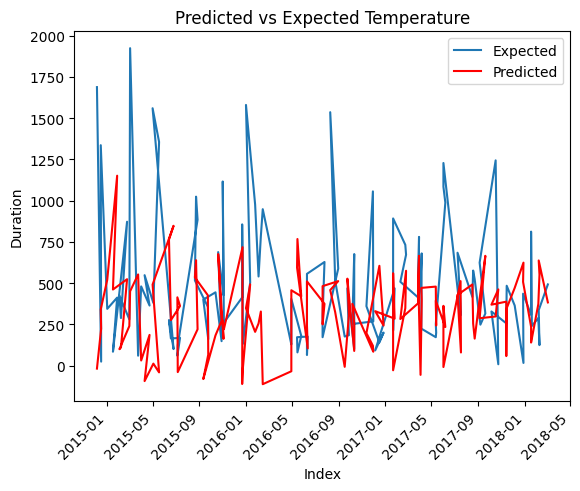

In [196]:
# Make predictions using the fitted model
predictions = model_fit.predict(start=len(Train_annual), end=len(Train_annual)+len(Test_annual)-1, dynamic=False).values


# Plot predictions vs expected
plt.plot(Test_annual.index, Test_annual, label='Expected')
plt.plot(Test_annual.index, predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Duration')
plt.title('Predicted vs Expected Temperature')
plt.legend();
plt.xticks(rotation=45, ha='right') 

In [197]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test_annual, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Autoregression'] = metrics_df.values[0]

In [198]:
results

,RMSE,MAE,MAPE (%)
Model,,,
Naive,781.742498,432.333333,53.370687
Seasonal Naive,835.948164,494.333333,70.303927
Mean,691.244144,373.152456,74.503720
Drift,781.760194,432.348573,53.369111
Autoregression,506.925756,366.571093,190.560142


In [199]:
# Train autoregression model
model = AutoReg(Train_annual, lags=25)  # Create an autoregression model with 25 lags
model_fit = model.fit()  # Fit the autoregression model to the training data
print('Coefficients: %s' % model_fit.params)  # Print the coefficients of the fitted model

Coefficients: const             198.606585
duration.s.L1       0.107858
duration.s.L2       0.068743
duration.s.L3      -0.020697
duration.s.L4      -0.006534
duration.s.L5       0.039387
duration.s.L6      -0.007452
duration.s.L7       0.091089
duration.s.L8       0.005569
duration.s.L9      -0.025093
duration.s.L10      0.006065
duration.s.L11      0.012672
duration.s.L12      0.005437
duration.s.L13     -0.018948
duration.s.L14      0.038259
duration.s.L15      0.086198
duration.s.L16     -0.038384
duration.s.L17      0.011863
duration.s.L18      0.031274
duration.s.L19      0.030891
duration.s.L20     -0.009445
duration.s.L21      0.056439
duration.s.L22      0.012632
duration.s.L23      0.110987
duration.s.L24      0.009711
duration.s.L25     -0.072798
dtype: float64


In [200]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             duration.s   No. Observations:                  458
Model:                    AutoReg(25)   Log Likelihood               -3158.943
Method:               Conditional MLE   S.D. of innovations            356.574
Date:                Sun, 23 Jun 2024   AIC                           6371.886
Time:                        15:02:18   BIC                           6481.796
Sample:                            25   HQIC                          6415.274
                                  458                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            198.6066     67.767      2.931      0.003      65.785     331.428
duration.s.L1      0.1079      0.048      2.251      0.024       0.014       0.202
duration.s.L2      0.0687      0.048      1.427      0.154      -0.026       0.163
duration.s.L3     -0.0207      0.048     -0.432      0.666      -0.115       0.073
duration.s.L4     -0.0065      0.048     -0.136      0.892      -0.101       0.087
duration.s.L5      0.0394      0.048      0.823      0.411      -0.054       0.133
duration.s.L6     -0.0075      0.048     -0.157      0.875      -0.101       0.086
duration.s.L7      0.0911      0.047      1.921      0.055      -0.002       0.184
duration.s.L8      0.0056      0.046      0.120      0.904      -0.085       0.096
duration.s.L9     -0.0251      0.046     -0.544      0.587      -0.116       0.065
duration.s.L10     0.0061      0.046      0.131      0.895      -0.084       0.096
duration.s.L11     0.0127      0.046      0.276      0.783      -0.077       0.103
duration.s.L12     0.0054      0.046      0.118      0.906      -0.085       0.095
duration.s.L13    -0.0189      0.046     -0.413      0.680      -0.109       0.071
duration.s.L14     0.0383      0.046      0.837      0.403      -0.051       0.128
duration.s.L15     0.0862      0.046      1.884      0.060      -0.003       0.176
duration.s.L16    -0.0384      0.046     -0.835      0.404      -0.128       0.052
duration.s.L17     0.0119      0.046      0.258      0.796      -0.078       0.102
duration.s.L18     0.0313      0.046      0.681      0.496      -0.059       0.121
duration.s.L19     0.0309      0.046      0.676      0.499      -0.059       0.120
duration.s.L20    -0.0094      0.046     -0.207      0.836      -0.099       0.080
duration.s.L21     0.0564      0.046      1.236      0.216      -0.033       0.146
duration.s.L22     0.0126      0.046      0.276      0.782      -0.077       0.102
duration.s.L23     0.1110      0.046      2.426      0.015       0.021       0.201
duration.s.L24     0.0097      0.046      0.212      0.832      -0.080       0.099
duration.s.L25    -0.0728      0.046     -1.575      0.115      -0.163       0.018
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0542           -0.0000j            1.0542           -0.0000
AR.2             1.0309           -0.3322j            1.0831           -0.0496
AR.3             1.0309           +0.3322j            1.0831            0.0496
AR.4             0.9122           -0.6000j            1.0919           -0.0926
AR.5             0.9122           +0.6000j            1.0919            0.0926
AR.6             0.7008           -0.8018j            1.0650           -0.1357
AR.7             0.7008           +0.8018j  

In [201]:
# calculate residuals
# Predict values for the training set using the fitted autoregression model
# Start predicting from the 26th observation (lags = 25) to the end of the training set
predictions_train = model_fit.predict(start=25, end=len(Train_annual), dynamic=False).values

# Extract the actual values of the training set starting from the 26th observation
Train_mod = Train_annual[25:].values

# Calculate residuals by subtracting predicted values from actual values for each corresponding observation
train_resid = [Train_mod[i] - predictions_train[i] for i in range(len(Train_mod))]

In [202]:
model_ma = AutoReg(train_resid, lags=200) 
model_fit_ma = model_ma.fit()
print('Coefficients: %s' % model_fit_ma.params)

Coefficients: [-4.67456268e+01  1.83560828e-01 -1.37234681e-02 -9.10161380e-02
  9.02301492e-02  1.25825009e-02 -1.33189127e-01  1.54585746e-01
 -3.09851020e-02 -9.21677927e-02  2.05165504e-01 -9.06449472e-02
 -1.67950838e-01  1.47383651e-01 -3.39759376e-02 -5.17543482e-02
  2.38161516e-01 -3.19323982e-01  5.95047345e-02 -2.28060008e-02
 -2.25595060e-01  7.29108126e-02  7.08506897e-02 -8.88574820e-02
 -1.92378913e-03  7.68104058e-02 -2.47878692e-01  1.57875475e-02
  3.98375450e-02 -2.69511249e-04  2.17525598e-01  4.31417887e-02
 -8.11336072e-02 -1.22745510e-01 -2.35781887e-02  2.32811998e-02
 -2.57829186e-03  2.91949067e-02  1.51877786e-02 -8.20521393e-02
  7.18968286e-02 -2.20474470e-01  3.16572393e-02  1.95602110e-01
 -2.86589366e-02 -1.47044388e-01 -1.88559408e-02 -1.69290140e-02
  6.77860234e-02  9.36970629e-02 -1.46124922e-01 -7.83846993e-02
  7.09088853e-02 -2.68985692e-01  1.47422366e-01  1.18923354e-01
 -1.42986828e-01  2.17169458e-01 -3.89344310e-02 -2.19552496e-01
  4.5462877

predicted=-737.165182, expected=1706.372895
predicted=107.338458, expected=-199.980138
predicted=-411.849728, expected=995.201389
predicted=296.692547, expected=-175.884841
predicted=559.022907, expected=-739.102866
predicted=634.020473, expected=-376.980692
predicted=-161.344158, expected=348.390448
predicted=-595.717540, expected=178.371803
predicted=363.984755, expected=324.594806
predicted=-297.231483, expected=40.431187
predicted=789.092030, expected=1473.490527
predicted=308.954981, expected=-492.559473
predicted=283.482585, expected=449.315529
predicted=-973.319452, expected=178.143234
predicted=-548.389598, expected=642.114033
predicted=-478.950131, expected=368.116871
predicted=-365.862630, expected=1397.275274
predicted=469.874659, expected=1068.743426
predicted=909.938705, expected=-747.286885
predicted=1107.928702, expected=-488.025096
predicted=-1741.714225, expected=-111.423148
predicted=-294.698196, expected=-193.213926
predicted=-873.981042, expected=-353.607013
predict

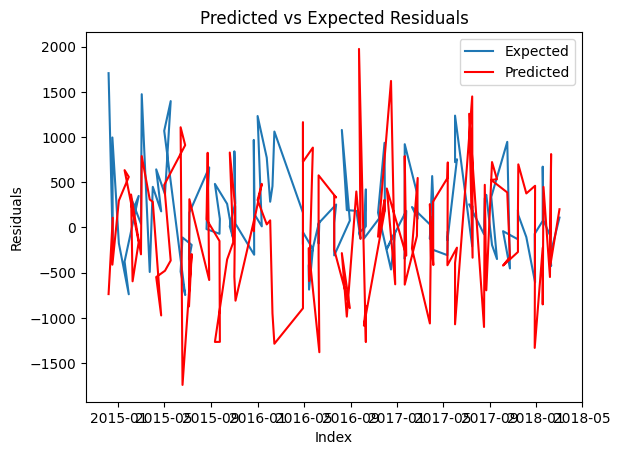

In [203]:
# Make predictions using the fitted model
predictions_ma = model_fit_ma.predict(start=len(train_resid), end=len(train_resid)+len(Test_annual)-1, dynamic=False)

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions_ma[i], Test_annual.iloc[i]-predictions[i]))

# Calculate and print Root Mean Squared Error (RMSE) for the predictions
# rmse = sqrt(mean_squared_error(test.values, predictions_ma))
# print('Test RMSE: %.3f' % rmse)

# Plot predictions vs expected
plt.plot(Test_annual.index, Test_annual - predictions, label='Expected')
plt.plot(Test_annual.index, predictions_ma, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Predicted vs Expected Residuals')
plt.legend();

#### ARMA

In [204]:
predictions_sum = [x + y for x, y in zip(predictions, predictions_ma)]
# Calculate metrics for the predictions
metrics = calculate_metrics(Test_annual, predictions_sum)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['AR+MA'] = metrics_df.values[0]

In [205]:
results

,RMSE,MAE,MAPE (%)
Model,,,
Naive,781.742498,432.333333,53.370687
Seasonal Naive,835.948164,494.333333,70.303927
Mean,691.244144,373.152456,74.503720
Drift,781.760194,432.348573,53.369111
Autoregression,506.925756,366.571093,190.560142
AR+MA,964.760838,777.842073,340.016432


The AR+MA model, although having the highest RMSE of all the models evaluated, shows a lower MAE than the simple Autoregression model and a significantly lower MAPE than all other models, suggesting that it might be preferable in terms of percentage accuracy, despite its higher absolute error.

In [206]:
# fix the seed for randomness
seed = 42
np.random.seed(seed)

# Automatically search for the best ARIMA model parameters using auto_arima function
auto_arima_model = auto_arima(Train_annual, start_p=1, start_q=1,
                              max_p=30, max_q=30, m=1,
                              seasonal=False,
                              d=None, trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True,
                              random_state=seed)

# Print the best parameters found by auto_arima
print("Best parameters found by auto_arima:", auto_arima_model.order)

# Create an ARIMA model with the best parameters obtained from auto_arima
model_arima = ARIMA(Train_annual, order=auto_arima_model.order)

# Fit the ARIMA model to the training data
arima_fit = model_arima.fit()

# Akaike Information Criterion (AIC) is a metric used to evaluate the goodness of fit of a statistical model while penalizing for the number of parameters in the model. 
# The lower the AIC value, the better the model is considered to be.
# "intercept" refers to an additional parameter in the model equation that represents a constant term or a baseline level. Including an intercept term allows the model to capture any systematic offset or bias in the data that is not explained by the autoregressive (AR), differencing (I), and moving average (MA) components.

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6743.158, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7123.669, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6918.241, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7015.499, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=6744.311, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=6744.414, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=6943.925, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=6846.102, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6745.279, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.153 seconds
Best parameters found by auto_arima: (1, 0, 1)


predicted=441.283289, expected=1688.000000
predicted=441.094721, expected=24.000000
predicted=440.910363, expected=1336.000000
predicted=440.730120, expected=344.000000
predicted=440.553902, expected=412.000000
predicted=440.381617, expected=84.000000
predicted=440.213179, expected=872.000000
predicted=440.048502, expected=288.000000
predicted=439.887501, expected=424.000000
predicted=439.730094, expected=280.000000
predicted=439.576201, expected=1924.000000
predicted=439.425745, expected=60.000000
predicted=439.278647, expected=480.000000
predicted=439.134833, expected=364.000000
predicted=438.994230, expected=548.000000
predicted=438.856766, expected=380.000000
predicted=438.722371, expected=1356.000000
predicted=438.590976, expected=1560.000000
predicted=438.462515, expected=100.000000
predicted=438.336922, expected=276.000000
predicted=438.214133, expected=164.000000
predicted=438.094085, expected=168.000000
predicted=437.976717, expected=60.000000
predicted=437.861969, expected=12

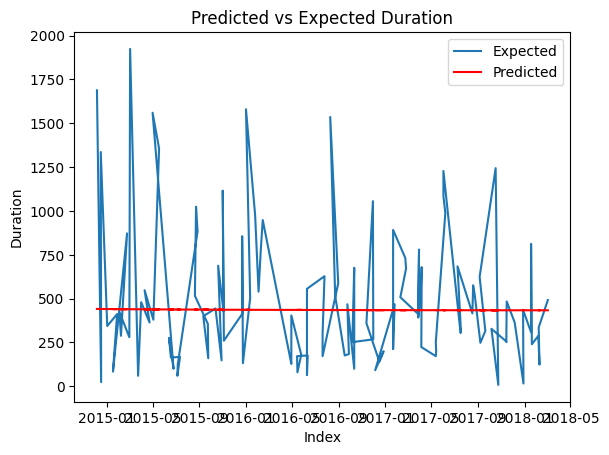

In [207]:
# Make predictions using the fitted model
predictions = arima_fit.predict(start=len(Train_annual), end=len(Train_annual)+len(Test_annual)-1, dynamic=False).values

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], Test_annual.iloc[i]))

# Plot predictions vs expected
plt.plot(Test_annual.index, Test_annual, label='Expected')
plt.plot(Test_annual.index, predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Duration')
plt.title('Predicted vs Expected Duration')
plt.legend();

In [208]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test_annual, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['ARIMA'] = metrics_df.values[0]

In [209]:
results

,RMSE,MAE,MAPE (%)
Model,,,
Naive,781.742498,432.333333,53.370687
Seasonal Naive,835.948164,494.333333,70.303927
Mean,691.244144,373.152456,74.503720
Drift,781.760194,432.348573,53.369111
Autoregression,506.925756,366.571093,190.560142
AR+MA,964.760838,777.842073,340.016432
ARIMA,398.564902,287.409190,174.782754


In [210]:
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             duration.s   No. Observations:                  458
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3365.117
Date:                Sun, 23 Jun 2024   AIC                           6738.234
Time:                        15:02:20   BIC                           6754.741
Sample:                             0   HQIC                          6744.735
                                - 458                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        432.8369     61.518      7.036      0.000     312.264     553.410
ar.L1          0.9777      0.025     39.638      0.000       0.929       1.026
ma.L1         -0.9449      0.035    -26.985      0.000      -1.014      -0.876
sigma2      1.409e+05   7715.027     18.266      0.000    1.26e+05    1.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):               660.45
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             1.87
Prob(H) (two-sided):                  0.50   Kurtosis:                         7.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [211]:

# Fit auto ARIMA model with seasonality
auto_aarima_model = auto_arima(Train_annual, start_p=1, start_q=1,
                              max_p=30, max_q=30, m=12,  # Set m to the seasonal period
                              seasonal=True,  # Enable seasonal ARIMA
                              d=None, trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True, 
                              random_state=seed)

# Print best parameters found
print("Order (p,d,q):", auto_aarima_model.order)
print("Seasonal Order (P,D,Q,m):", auto_aarima_model.seasonal_order)

# Fit SARIMA model with the best parameters
model_sarima = ARIMA(Train, order=auto_aarima_model.order, seasonal_order=auto_aarima_model.seasonal_order)
sarima_fit = model_sarima.fit()

# Print summary of the fitted model
print(sarima_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=6745.790, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=6745.802, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=6746.521, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=7123.669, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=6747.606, Time=0.14 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=6747.618, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=6743.883, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=6745.762, Time=0.08 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=6747.924, Time=0.85 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=6741.191, Time=0.04 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=6743.143, Time=0.17 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=6743.140, Time=0.12 sec
 ARIMA(2,0,0)(1,0,1)[12] inte

The ARIMA(2,0,0)(0,0,0)[12] model is chosen based on its lowest AIC value among all evaluated configurations. This suggests that this model provides a good balance between model complexity and fit to the data.

This model with intercept is well-suited for forecasting duration.s based on the annual_data, demostrating robust stadistical properties.

In [212]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['SARIMA'] = metrics_df.values[0]

In [213]:
results

,RMSE,MAE,MAPE (%)
Model,,,
Naive,781.742498,432.333333,53.370687
Seasonal Naive,835.948164,494.333333,70.303927
Mean,691.244144,373.152456,74.503720
Drift,781.760194,432.348573,53.369111
Autoregression,506.925756,366.571093,190.560142
AR+MA,964.760838,777.842073,340.016432
ARIMA,398.564902,287.409190,174.782754
SARIMA,513.729458,326.034422,79.758635


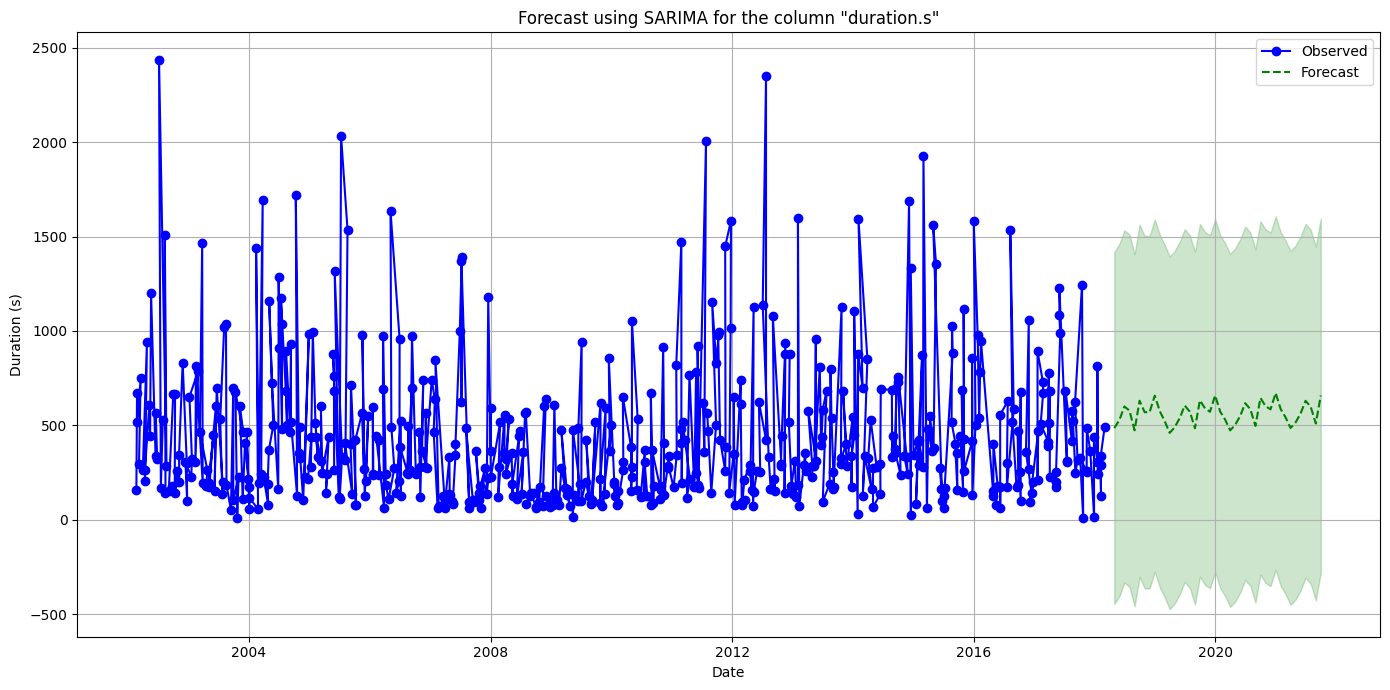

In [214]:

# Assuming you have annual_data loaded containing data from 2002 to 2018
# Also assuming you have defined and executed the forecast_column function

# Forecasts for the 'duration.s' column with 42 steps ahead
column_name = 'duration.s'
steps = 42

# Get forecasts using the forecast_column function
forecast_df = forecast_column(column_name, steps)

# Extract initial date and forecast dates
last_date = annual_data.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=steps, freq='M')

# Create figure and axes for the plot
plt.figure(figsize=(14, 7))

# Plot of observed data
plt.plot(annual_data.index, annual_data[column_name], label='Observed', marker='o', color='blue')

# Plot of forecasts
plt.plot(forecast_dates, forecast_df['mean'], label='Forecast', linestyle='--', color='green')

# Fill confidence interval
plt.fill_between(forecast_dates, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='green', alpha=0.2)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Duration (s)')
plt.title('Forecast using SARIMA for the column "duration.s"')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [215]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test_annual, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Holt_Winters'] = metrics_df.values[0]

In [216]:
results

,RMSE,MAE,MAPE (%)
Model,,,
Naive,781.742498,432.333333,53.370687
Seasonal Naive,835.948164,494.333333,70.303927
Mean,691.244144,373.152456,74.503720
Drift,781.760194,432.348573,53.369111
Autoregression,506.925756,366.571093,190.560142
AR+MA,964.760838,777.842073,340.016432
ARIMA,398.564902,287.409190,174.782754
SARIMA,513.729458,326.034422,79.758635
Holt_Winters,398.564902,287.409190,174.782754


In [217]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Predictions function
def forecast_column(column_name, steps=42):
    model = SARIMAX(annual_data[column_name], order=(1, 2, 2), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    forecast = results.get_forecast(steps=steps)
    return forecast.summary_frame()

### Convolutional Neural Networks 

In [218]:

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        seq_x, seq_y = sequence.iloc[i:i + n_steps], sequence.iloc[i + n_steps]
        X.append(seq_x.values)  # Append the input sequence values to X
        y.append(seq_y)         # Append the output value to y

    return np.array(X), np.array(y)


In [219]:
# Example usage with annual_data DataFrame
# Assuming 'annual_data' has columns 'duration.s' and 'energy.kev'

# Choose a number of time steps
n_steps = 3

# Split sequence for 'duration.s'
X, y = split_sequence(annual_data['duration.s'], n_steps)

# Split sequence for 'energy.kev'
#X_energy, y_energy = split_sequence(annual_data['energy.kev'], n_steps)

# Summarize the data
for i in range(len(X)):
    print(f"Input Sequence (duration.s): {X[i]}, Target Value: {y[i]}")



Input Sequence (duration.s): [160 672 516], Target Value: 752
Input Sequence (duration.s): [672 516 752], Target Value: 296
Input Sequence (duration.s): [516 752 296], Target Value: 264
Input Sequence (duration.s): [752 296 264], Target Value: 944
Input Sequence (duration.s): [296 264 944], Target Value: 204
Input Sequence (duration.s): [264 944 204], Target Value: 264
Input Sequence (duration.s): [944 204 264], Target Value: 608
Input Sequence (duration.s): [204 264 608], Target Value: 444
Input Sequence (duration.s): [264 608 444], Target Value: 1200
Input Sequence (duration.s): [ 608  444 1200], Target Value: 336
Input Sequence (duration.s): [ 444 1200  336], Target Value: 320
Input Sequence (duration.s): [1200  336  320], Target Value: 564
Input Sequence (duration.s): [336 320 564], Target Value: 528
Input Sequence (duration.s): [320 564 528], Target Value: 168
Input Sequence (duration.s): [564 528 168], Target Value: 2436
Input Sequence (duration.s): [ 528  168 2436], Target Value

In [220]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [221]:
# Set the seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

# Define the Sequential model
model = Sequential()

# Add a 1D convolutional layer with 64 filters, kernel size of 2, ReLU activation
# The input shape is defined by n_steps (timesteps) and n_features
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))

# Add a max pooling layer to reduce the dimensionality of the data
# Pool size of 2 means it reduces the input size by half
model.add(MaxPooling1D(pool_size=2))

# Flatten the data to convert the 2D matrix into a 1D vector
# This prepares the data for the fully connected layers
model.add(Flatten())

# Add a dense (fully connected) layer with 50 neurons and ReLU activation
# This layer interprets the features extracted by the convolutional layers
model.add(Dense(50, activation='relu'))

# Add the output layer with a single neuron
# No activation function is specified, meaning it will use a linear activation by default
model.add(Dense(1))

# Compile the model using the Adam optimizer and mean squared error (MSE) loss function
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=2000, verbose=0)

In [222]:
# Demonstrate prediction
x_input = np.array([70, 80, 90]).reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat

array([[295.35803]], dtype=float32)

Value -> 282.19

#### Multivariate CNN Models

In [223]:


in_seq1 = annual_data['duration.s'].values.reshape(-1, 1)
in_seq2 = annual_data['total.counts'].values.reshape(-1, 1)

out_seq = (in_seq1 + in_seq2).reshape(-1, 1)

dataset = np.hstack((in_seq1, in_seq2, out_seq))

print(dataset)


[[  160. 16512. 16672.]
 [  672. 70296. 70968.]
 [  516. 33144. 33660.]
 ...
 [  124.  2888.  3012.]
 [  336.  2328.  2664.]
 [  492. 15816. 16308.]]


In [224]:
def split_sequences(sequences, n_steps):
    X, y = [], []  # Initialize empty lists for inputs and outputs
    
    for i in range(len(sequences) - n_steps + 1):
        # Define the end index of the current sequence pattern
        end_ix = i + n_steps
        
        # Extract input and output parts of the pattern
        seq_x = sequences[i:end_ix, :-1]
        seq_y = sequences[end_ix - 1, -1]
        
        X.append(seq_x)  # Append input sequence to X
        y.append(seq_y)  # Append output value to y
    
    return np.array(X), np.array(y)  # Convert lists to numpy arrays and return

In [225]:
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

(571, 3, 2) (571,)
[[  160. 16512.]
 [  672. 70296.]
 [  516. 33144.]] 33660.0
[[6.720000e+02 7.029600e+04]
 [5.160000e+02 3.314400e+04]
 [7.520000e+02 1.835976e+06]] 1836728.0
[[5.160000e+02 3.314400e+04]
 [7.520000e+02 1.835976e+06]
 [2.960000e+02 3.371520e+05]] 337448.0
[[7.520000e+02 1.835976e+06]
 [2.960000e+02 3.371520e+05]
 [2.640000e+02 7.009800e+04]] 70362.0
[[2.96000e+02 3.37152e+05]
 [2.64000e+02 7.00980e+04]
 [9.44000e+02 5.94580e+05]] 595524.0
[[2.6400e+02 7.0098e+04]
 [9.4400e+02 5.9458e+05]
 [2.0400e+02 3.3456e+04]] 33660.0
[[9.4400e+02 5.9458e+05]
 [2.0400e+02 3.3456e+04]
 [2.6400e+02 5.2000e+02]] 784.0
[[   204.  33456.]
 [   264.    520.]
 [   608. 172416.]] 173024.0
[[   264.    520.]
 [   608. 172416.]
 [   444.  59784.]] 60228.0
[[   608. 172416.]
 [   444.  59784.]
 [  1200. 101276.]] 102476.0
[[   444.  59784.]
 [  1200. 101276.]
 [   336.  37584.]] 37920.0
[[  1200. 101276.]
 [   336.  37584.]
 [   320.  32016.]] 32336.0
[[  336. 37584.]
 [  320. 32016.]
 [  564

In [226]:
# Set the seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

n_features = X.shape[2]

# Define the Sequential model
model = Sequential()

# Add a 1D convolutional layer with 64 filters, kernel size of 2, and ReLU activation
# The input shape is defined by n_steps (timesteps) and n_features
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))

# Add a max pooling layer to reduce the dimensionality of the data
# Pool size of 2 means it reduces the input size by half
model.add(MaxPooling1D(pool_size=2))

# Flatten the data to convert the 2D matrix into a 1D vector
# This prepares the data for the fully connected layers
model.add(Flatten())

# Add a dense (fully connected) layer with 50 neurons and ReLU activation
# This layer interprets the features extracted by the convolutional layers
model.add(Dense(50, activation='relu'))

# Add the output layer with a single neuron
# No activation function is specified, meaning it will use a linear activation by default
model.add(Dense(1))

# Compile the model using the Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset
model.fit(X, y, epochs=2000, verbose=0)

# Demonstrate prediction
# Define a new input sample
x_input = np.array([[80, 85], [90, 95], [100, 105]])
# Reshape input to match the model's expected input shape (1 sample, n_steps, n_features)
x_input = x_input.reshape((1, n_steps, n_features))

# Make a prediction using the model
yhat = model.predict(x_input, verbose=0)

# Print the predicted output
print(yhat)

[[-61.52015]]


Value -> -1536.45

#### Multiple Parallel Series

In [227]:
# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = [], []  # Initialize empty lists for inputs and outputs
    for i in range(len(sequences) - n_steps):
        # Define the end index of the current sequence pattern
        end_ix = i + n_steps
        # Extract input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)  # Append input sequence to X
        y.append(seq_y)  # Append output sequence to y
    return np.array(X), np.array(y)  # Convert lists to numpy arrays and return

# Define input sequences
in_seq1 = annual_data['duration.s'].values.reshape(-1, 1)
in_seq2 = annual_data['total.counts'].values.reshape(-1, 1)

# Define output sequence as the sum of input sequences
out_seq = (in_seq1 + in_seq2).reshape(-1, 1)

# Horizontally stack columns to form the dataset
dataset = np.hstack((in_seq1, in_seq2, out_seq))

# Choose the number of time steps
n_steps = 3

# Convert dataset into input/output pairs
X, y = split_sequences(dataset, n_steps)

# Print the shapes of the input and output arrays
print(X.shape, y.shape)

# Summarize the data
for i in range(len(X)):
    print(X[i], y[i])

(570, 3, 3) (570, 3)
[[  160. 16512. 16672.]
 [  672. 70296. 70968.]
 [  516. 33144. 33660.]] [7.520000e+02 1.835976e+06 1.836728e+06]
[[6.720000e+02 7.029600e+04 7.096800e+04]
 [5.160000e+02 3.314400e+04 3.366000e+04]
 [7.520000e+02 1.835976e+06 1.836728e+06]] [2.96000e+02 3.37152e+05 3.37448e+05]
[[5.160000e+02 3.314400e+04 3.366000e+04]
 [7.520000e+02 1.835976e+06 1.836728e+06]
 [2.960000e+02 3.371520e+05 3.374480e+05]] [  264. 70098. 70362.]
[[7.520000e+02 1.835976e+06 1.836728e+06]
 [2.960000e+02 3.371520e+05 3.374480e+05]
 [2.640000e+02 7.009800e+04 7.036200e+04]] [   944. 594580. 595524.]
[[2.96000e+02 3.37152e+05 3.37448e+05]
 [2.64000e+02 7.00980e+04 7.03620e+04]
 [9.44000e+02 5.94580e+05 5.95524e+05]] [  204. 33456. 33660.]
[[2.64000e+02 7.00980e+04 7.03620e+04]
 [9.44000e+02 5.94580e+05 5.95524e+05]
 [2.04000e+02 3.34560e+04 3.36600e+04]] [264. 520. 784.]
[[9.44000e+02 5.94580e+05 5.95524e+05]
 [2.04000e+02 3.34560e+04 3.36600e+04]
 [2.64000e+02 5.20000e+02 7.84000e+02]] [  

In [228]:
# Set the seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

n_features = X.shape[2]

# Define the Sequential model
model = Sequential()

# Add a 1D convolutional layer with 64 filters, kernel size of 2, and ReLU activation
# The input shape is defined by n_steps (timesteps) and n_features (number of features)
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))

# Add a max pooling layer to reduce the dimensionality of the data
# Pool size of 2 means it reduces the input size by half
model.add(MaxPooling1D(pool_size=2))

# Flatten the data to convert the 2D matrix into a 1D vector
# This prepares the data for the fully connected layers
model.add(Flatten())

# Add a dense (fully connected) layer with 50 neurons and ReLU activation
# This layer interprets the features extracted by the convolutional layers
model.add(Dense(50, activation='relu'))

# Add the output layer with neurons equal to the number of features
# This will produce an output for each feature in the time series
model.add(Dense(n_features))

# Compile the model using the Adam optimizer and mean squared error (MSE) loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset
# Train the model for 3000 epochs
model.fit(X, y, epochs=3000, verbose=0)

In [229]:
# Demonstrate prediction
# Define a new input sample
x_input = np.array([[70, 75, 145], [80, 85, 165], [90, 95, 185]])
# Reshape input to match the model's expected input shape (1 sample, n_steps, n_features)
x_input = x_input.reshape((1, n_steps, n_features))

# Make a prediction using the model
yhat = model([x_input])

# Print the predicted output
print(yhat)

tf.Tensor([[ -153.60411 75569.28    74244.84   ]], shape=(1, 3), dtype=float32)


#### Multi-Step CNN 

In [230]:
# Function to split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = [], []  # Initialize empty lists for inputs and outputs
    for i in range(len(sequence) - n_steps_in - n_steps_out + 1):
        # Define the end index of the input sequence
        end_ix = i + n_steps_in
        # Define the end index of the output sequence
        out_end_ix = end_ix + n_steps_out
        # Extract input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)  # Append input sequence to X
        y.append(seq_y)  # Append output sequence to y
    return np.array(X), np.array(y)  # Convert lists to numpy arrays and return

In [231]:
# Define input sequence
raw_seq = annual_data['duration.s'].values.reshape(-1, 1)

# Choose the number of time steps for input and output
n_steps_in, n_steps_out = 3, 2

# Split the raw sequence into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# Summarize the data
for i in range(len(X)):
    print(f"Input: {X[i]}, Output: {y[i]}")

Input: [[160]
 [672]
 [516]], Output: [[752]
 [296]]
Input: [[672]
 [516]
 [752]], Output: [[296]
 [264]]
Input: [[516]
 [752]
 [296]], Output: [[264]
 [944]]
Input: [[752]
 [296]
 [264]], Output: [[944]
 [204]]
Input: [[296]
 [264]
 [944]], Output: [[204]
 [264]]
Input: [[264]
 [944]
 [204]], Output: [[264]
 [608]]
Input: [[944]
 [204]
 [264]], Output: [[608]
 [444]]
Input: [[204]
 [264]
 [608]], Output: [[ 444]
 [1200]]
Input: [[264]
 [608]
 [444]], Output: [[1200]
 [ 336]]
Input: [[ 608]
 [ 444]
 [1200]], Output: [[336]
 [320]]
Input: [[ 444]
 [1200]
 [ 336]], Output: [[320]
 [564]]
Input: [[1200]
 [ 336]
 [ 320]], Output: [[564]
 [528]]
Input: [[336]
 [320]
 [564]], Output: [[528]
 [168]]
Input: [[320]
 [564]
 [528]], Output: [[ 168]
 [2436]]
Input: [[564]
 [528]
 [168]], Output: [[2436]
 [ 284]]
Input: [[ 528]
 [ 168]
 [2436]], Output: [[ 284]
 [1508]]
Input: [[ 168]
 [2436]
 [ 284]], Output: [[1508]
 [ 140]]
Input: [[2436]
 [ 284]
 [1508]], Output: [[140]
 [180]]
Input: [[ 284]
 

In [232]:
# Reshape from [samples, timesteps] to [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [233]:
# Set the seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

# Define the model
model = Sequential([
    # Add a 1D convolutional layer with 64 filters, kernel size of 2, and ReLU activation
    # The input shape is defined by n_steps_in (timesteps) and n_features (number of features)
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)),
    
    # Add a max pooling layer to reduce the dimensionality of the data
    # Pool size of 2 means it reduces the input size by half
    MaxPooling1D(pool_size=2),
    
    # Flatten the data to convert the 2D matrix into a 1D vector
    # This prepares the data for the fully connected layers
    Flatten(),
    
    # Add a dense (fully connected) layer with 50 neurons and ReLU activation
    Dense(50, activation='relu'),
    
    # Add the output layer with neurons equal to the number of steps we want to predict (n_steps_out)
    Dense(n_steps_out)
])

# Compile the model using the Adam optimizer and mean squared error (MSE) loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset (X, y)
# Train the model for 3000 epochs
model.fit(X, y, epochs=3000, verbose=0)

In [234]:
# Demonstrate prediction
# Define a new input sample
x_input = np.array([70, 80, 90]).reshape((1, n_steps_in, n_features))

# Make a prediction using the model
yhat = model([x_input])

# Print the predicted output
print(yhat)

tf.Tensor([[257.28732 280.56015]], shape=(1, 2), dtype=float32)


#### MLP

In [235]:

def feature_engineering(dataframe):
    """
    Create time-based features from the datetime index of the DataFrame.
    
    Parameters:
    dataframe (DataFrame): The input DataFrame with a datetime index.
    
    Returns:
    DataFrame: A new DataFrame with additional time-based features.
    """
    new_df = dataframe.copy()  # Create a copy of the DataFrame to avoid modifying the original
    new_df['dayofweek'] = dataframe.index.dayofweek
    new_df['quarter'] = dataframe.index.quarter
    new_df['month'] = dataframe.index.month
    new_df['year'] = dataframe.index.year
    new_df['dayofyear'] = dataframe.index.dayofyear
    return new_df


annual_data_eng = feature_engineering(annual_data)


In [236]:

def create_multivariate_data(df, window_size):
    """
    Convert the DataFrame to a multivariate dataset with a sliding window approach.
    
    Parameters:
    df (DataFrame): The input DataFrame.
    window_size (int): The size of the sliding window (e.g., 7 for a week).
    
    Returns:
    X, y (numpy arrays): Multivariate input features and target values.
    """
    X, y = [], []
    for i in range(len(df) - window_size):
        X.append(df.iloc[i:i + window_size].values)
        y.append(df.iloc[i + window_size].values)
    return np.array(X), np.array(y)

X, y = create_multivariate_data(annual_data_eng[['dayofweek', 'quarter', 'month', 'year', 'dayofyear']], window_size=7)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (566, 7, 5)
y shape: (566, 5)


In [237]:
print(df_eng.head())
print(len(df_eng))


              flare start.time      peak       end  duration.s  peak.c/s  \
start.date                                                                 
2002-02-19  2021916   16:31:00  16:31:42  16:33:40         160       136   
2002-02-23  2022381   23:05:16  23:09:10  23:16:28         672        30   
2002-02-25  2022554   18:14:24  18:18:02  18:23:00         516        20   
2002-03-17  2031701   10:08:40  10:17:42  10:21:12         752      1328   
2002-03-07  2030745   07:09:16  07:10:10  07:14:12         296       216   

            total.counts energy.kev  x.pos.asec  y.pos.asec  ...  flag.3  \
start.date                                                   ...           
2002-02-19       16512.0       6-12         -42        -196  ...     NaN   
2002-02-23       70296.0       6-12         714        -204  ...     NaN   
2002-02-25       33144.0       6-12         772          43  ...     NaN   
2002-03-17     1835976.0     50-100        -347        -237  ...      P1   
2002-03-07 

In [238]:
X1 = X[:, :, 0]
X2 = X[:, :, 1]
X3 = X[:, :, 2]
X4 = X[:, :, 3]
X5 = X[:, :, 4]


In [239]:
# Split data into training, validation, and test sets (60% training, 20% validation, 20% testing)
X1_train, X1_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.4, random_state=seed)
X1_val, X1_test, y_val, y_test = train_test_split(X1_temp, y_temp, test_size=0.5, random_state=seed)

X2_train, X2_temp, _, _ = train_test_split(X2, y, test_size=0.4, random_state=seed)
X2_val, X2_test, _, _ = train_test_split(X2_temp, y_temp, test_size=0.5, random_state=seed)

X3_train, X3_temp, _, _ = train_test_split(X3, y, test_size=0.4, random_state=seed)
X3_val, X3_test, _, _ = train_test_split(X3_temp, y_temp, test_size=0.5, random_state=seed)

X4_train, X4_temp, _, _ = train_test_split(X4, y, test_size=0.4, random_state=seed)
X4_val, X4_test, _, _ = train_test_split(X4_temp, y_temp, test_size=0.5, random_state=seed)

X5_train, X5_temp, _, _ = train_test_split(X5, y, test_size=0.4, random_state=seed)
X5_val, X5_test, _, _ = train_test_split(X5_temp, y_temp, test_size=0.5, random_state=seed)


In [240]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Define the number of time steps
n_steps = 7
n_features = 1  # Assuming each time step has a single feature

# First input model
visible1 = Input(shape=(n_steps, n_features))
conv1 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible1)
flat1 = Flatten()(conv1)

# Second input model
visible2 = Input(shape=(n_steps, n_features))
conv2 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible2)
flat2 = Flatten()(conv2)

# Third input model
visible3 = Input(shape=(n_steps, n_features))
conv3 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible3)
flat3 = Flatten()(conv3)

# Fourth input model
visible4 = Input(shape=(n_steps, n_features))
conv4 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible4)
flat4 = Flatten()(conv4)

# Fifth input model
visible5 = Input(shape=(n_steps, n_features))
conv5 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible5)
flat5 = Flatten()(conv5)

# Merge input models
merged = concatenate([flat1, flat2, flat3, flat4, flat5])
dense1 = Dense(100, activation='relu')(merged)
output = Dense(1)(dense1)

# Create and compile the model
model_3 = Model(inputs=[visible1, visible2, visible3, visible4, visible5], outputs=output)
model_3.compile(optimizer='adam', loss='mse')

# Fit the model
history_3 = model_3.fit(
    [X1_train, X2_train, X3_train, X4_train, X5_train], y_train,
    epochs=1000, verbose=1,
    validation_data=([X1_val, X2_val, X3_val, X4_val, X5_val], y_val)
)

Epoch 1/1000
11/11 [==============================] - 1s 19ms/step - loss: 651859.3750 - val_loss: 630032.4375
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 624978.4375 - val_loss: 625712.4375
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 623251.0000 - val_loss: 623913.0000
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 621922.6250 - val_loss: 624221.3750
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 621877.0625 - val_loss: 623772.0625
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 621683.3750 - val_loss: 623558.6250
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 621601.1250 - val_loss: 623496.0625
Epoch 8/1000
11/11 [==============================] - 0s 5ms/step - loss: 621542.6250 - val_loss: 623484.6875
Epoch 9/1000
11/11 [==============================] - 0s 5ms/step - loss: 621519.6875 - val_loss: 623496.6250
Epoch 10/

Epoch 75/1000
11/11 [==============================] - 0s 5ms/step - loss: 621494.6250 - val_loss: 623489.6875
Epoch 76/1000
11/11 [==============================] - 0s 5ms/step - loss: 621475.7500 - val_loss: 623431.0625
Epoch 77/1000
11/11 [==============================] - 0s 5ms/step - loss: 621484.6250 - val_loss: 623428.9375
Epoch 78/1000
11/11 [==============================] - 0s 5ms/step - loss: 621468.4375 - val_loss: 623459.8125
Epoch 79/1000
11/11 [==============================] - 0s 5ms/step - loss: 621493.0000 - val_loss: 623451.7500
Epoch 80/1000
11/11 [==============================] - 0s 5ms/step - loss: 621485.5625 - val_loss: 623570.1875
Epoch 81/1000
11/11 [==============================] - 0s 5ms/step - loss: 621493.2500 - val_loss: 623510.1875
Epoch 82/1000
11/11 [==============================] - 0s 5ms/step - loss: 621485.6250 - val_loss: 623427.7500
Epoch 83/1000
11/11 [==============================] - 0s 5ms/step - loss: 621458.5000 - val_loss: 623427.6250
E

11/11 [==============================] - 0s 5ms/step - loss: 621452.3750 - val_loss: 623431.4375
Epoch 149/1000
11/11 [==============================] - 0s 5ms/step - loss: 621459.1875 - val_loss: 623443.8750
Epoch 150/1000
11/11 [==============================] - 0s 5ms/step - loss: 621515.1250 - val_loss: 623557.2500
Epoch 151/1000
11/11 [==============================] - 0s 5ms/step - loss: 621543.1875 - val_loss: 623545.6250
Epoch 152/1000
11/11 [==============================] - 0s 5ms/step - loss: 621528.8750 - val_loss: 623449.7500
Epoch 153/1000
11/11 [==============================] - 0s 5ms/step - loss: 621488.1875 - val_loss: 623427.5625
Epoch 154/1000
11/11 [==============================] - 0s 5ms/step - loss: 621463.1250 - val_loss: 623430.8125
Epoch 155/1000
11/11 [==============================] - 0s 5ms/step - loss: 621461.5625 - val_loss: 623422.3125
Epoch 156/1000
11/11 [==============================] - 0s 5ms/step - loss: 621453.0000 - val_loss: 623445.6875
Epoch 1

11/11 [==============================] - 0s 5ms/step - loss: 621444.0625 - val_loss: 623420.7500
Epoch 222/1000
11/11 [==============================] - 0s 5ms/step - loss: 621442.1875 - val_loss: 623546.2500
Epoch 223/1000
11/11 [==============================] - 0s 5ms/step - loss: 621469.3750 - val_loss: 623422.9375
Epoch 224/1000
11/11 [==============================] - 0s 5ms/step - loss: 621459.0000 - val_loss: 623435.3750
Epoch 225/1000
11/11 [==============================] - 0s 5ms/step - loss: 621469.6875 - val_loss: 623529.6250
Epoch 226/1000
11/11 [==============================] - 0s 5ms/step - loss: 621506.3750 - val_loss: 623460.7500
Epoch 227/1000
11/11 [==============================] - 0s 5ms/step - loss: 621499.1250 - val_loss: 623487.5625
Epoch 228/1000
11/11 [==============================] - 0s 5ms/step - loss: 621450.1875 - val_loss: 623445.3125
Epoch 229/1000
11/11 [==============================] - 0s 5ms/step - loss: 621465.8125 - val_loss: 623456.3125
Epoch 2

11/11 [==============================] - 0s 5ms/step - loss: 621440.6875 - val_loss: 623441.5625
Epoch 295/1000
11/11 [==============================] - 0s 5ms/step - loss: 621449.0625 - val_loss: 623492.4375
Epoch 296/1000
11/11 [==============================] - 0s 5ms/step - loss: 621433.0625 - val_loss: 623468.7500
Epoch 297/1000
11/11 [==============================] - 0s 5ms/step - loss: 621466.2500 - val_loss: 623442.6875
Epoch 298/1000
11/11 [==============================] - 0s 5ms/step - loss: 621491.5625 - val_loss: 623418.5000
Epoch 299/1000
11/11 [==============================] - 0s 5ms/step - loss: 621517.6250 - val_loss: 623454.7500
Epoch 300/1000
11/11 [==============================] - 0s 5ms/step - loss: 621435.9375 - val_loss: 623423.9375
Epoch 301/1000
11/11 [==============================] - 0s 5ms/step - loss: 621467.5000 - val_loss: 623413.5000
Epoch 302/1000
11/11 [==============================] - 0s 5ms/step - loss: 621459.9375 - val_loss: 623421.4375
Epoch 3

11/11 [==============================] - 0s 5ms/step - loss: 621436.4375 - val_loss: 623554.8750
Epoch 368/1000
11/11 [==============================] - 0s 5ms/step - loss: 621471.5000 - val_loss: 623489.8125
Epoch 369/1000
11/11 [==============================] - 0s 5ms/step - loss: 621470.6250 - val_loss: 623496.4375
Epoch 370/1000
11/11 [==============================] - 0s 5ms/step - loss: 621463.6250 - val_loss: 623407.3125
Epoch 371/1000
11/11 [==============================] - 0s 5ms/step - loss: 621432.3750 - val_loss: 623412.3750
Epoch 372/1000
11/11 [==============================] - 0s 5ms/step - loss: 621430.6250 - val_loss: 623516.6250
Epoch 373/1000
11/11 [==============================] - 0s 5ms/step - loss: 621460.1250 - val_loss: 623574.8750
Epoch 374/1000
11/11 [==============================] - 0s 5ms/step - loss: 621498.5000 - val_loss: 623501.1875
Epoch 375/1000
11/11 [==============================] - 0s 5ms/step - loss: 621442.6250 - val_loss: 623454.0000
Epoch 3

11/11 [==============================] - 0s 5ms/step - loss: 621418.3750 - val_loss: 623413.1250
Epoch 441/1000
11/11 [==============================] - 0s 5ms/step - loss: 621420.2500 - val_loss: 623450.5000
Epoch 442/1000
11/11 [==============================] - 0s 5ms/step - loss: 621414.4375 - val_loss: 623428.8125
Epoch 443/1000
11/11 [==============================] - 0s 5ms/step - loss: 621410.1250 - val_loss: 623407.1250
Epoch 444/1000
11/11 [==============================] - 0s 5ms/step - loss: 621408.4375 - val_loss: 623421.5625
Epoch 445/1000
11/11 [==============================] - 0s 5ms/step - loss: 621407.9375 - val_loss: 623414.5000
Epoch 446/1000
11/11 [==============================] - 0s 6ms/step - loss: 621407.4375 - val_loss: 623395.5000
Epoch 447/1000
11/11 [==============================] - 0s 5ms/step - loss: 621409.0625 - val_loss: 623408.0000
Epoch 448/1000
11/11 [==============================] - 0s 6ms/step - loss: 621428.3125 - val_loss: 623417.9375
Epoch 4

11/11 [==============================] - 0s 5ms/step - loss: 621402.1875 - val_loss: 623389.3750
Epoch 514/1000
11/11 [==============================] - 0s 5ms/step - loss: 621398.2500 - val_loss: 623384.5000
Epoch 515/1000
11/11 [==============================] - 0s 5ms/step - loss: 621421.1250 - val_loss: 623410.6875
Epoch 516/1000
11/11 [==============================] - 0s 5ms/step - loss: 621414.9375 - val_loss: 623388.2500
Epoch 517/1000
11/11 [==============================] - 0s 5ms/step - loss: 621390.2500 - val_loss: 623385.5000
Epoch 518/1000
11/11 [==============================] - 0s 5ms/step - loss: 621408.6875 - val_loss: 623407.6250
Epoch 519/1000
11/11 [==============================] - 0s 5ms/step - loss: 621391.6875 - val_loss: 623523.3750
Epoch 520/1000
11/11 [==============================] - 0s 5ms/step - loss: 621427.0000 - val_loss: 623380.6250
Epoch 521/1000
11/11 [==============================] - 0s 5ms/step - loss: 621406.6875 - val_loss: 623419.3125
Epoch 5

11/11 [==============================] - 0s 5ms/step - loss: 621373.6875 - val_loss: 623389.6875
Epoch 587/1000
11/11 [==============================] - 0s 5ms/step - loss: 621369.4375 - val_loss: 623388.1875
Epoch 588/1000
11/11 [==============================] - 0s 5ms/step - loss: 621373.0000 - val_loss: 623363.1875
Epoch 589/1000
11/11 [==============================] - 0s 5ms/step - loss: 621371.1875 - val_loss: 623364.8125
Epoch 590/1000
11/11 [==============================] - 0s 5ms/step - loss: 621365.6875 - val_loss: 623375.6875
Epoch 591/1000
11/11 [==============================] - 0s 5ms/step - loss: 621377.0625 - val_loss: 623395.9375
Epoch 592/1000
11/11 [==============================] - 0s 5ms/step - loss: 621381.8750 - val_loss: 623395.3125
Epoch 593/1000
11/11 [==============================] - 0s 5ms/step - loss: 621369.5625 - val_loss: 623377.3750
Epoch 594/1000
11/11 [==============================] - 0s 5ms/step - loss: 621363.4375 - val_loss: 623373.0000
Epoch 5

11/11 [==============================] - 0s 5ms/step - loss: 621356.6875 - val_loss: 623352.1875
Epoch 660/1000
11/11 [==============================] - 0s 6ms/step - loss: 621354.3125 - val_loss: 623356.1875
Epoch 661/1000
11/11 [==============================] - 0s 5ms/step - loss: 621349.6875 - val_loss: 623367.3750
Epoch 662/1000
11/11 [==============================] - 0s 5ms/step - loss: 621362.2500 - val_loss: 623356.1250
Epoch 663/1000
11/11 [==============================] - 0s 5ms/step - loss: 621349.1250 - val_loss: 623354.8125
Epoch 664/1000
11/11 [==============================] - 0s 5ms/step - loss: 621349.4375 - val_loss: 623351.8750
Epoch 665/1000
11/11 [==============================] - 0s 5ms/step - loss: 621343.8750 - val_loss: 623352.1875
Epoch 666/1000
11/11 [==============================] - 0s 5ms/step - loss: 621348.3750 - val_loss: 623353.7500
Epoch 667/1000
11/11 [==============================] - 0s 5ms/step - loss: 621350.5000 - val_loss: 623359.6250
Epoch 6

11/11 [==============================] - 0s 5ms/step - loss: 621344.1250 - val_loss: 623356.1250
Epoch 733/1000
11/11 [==============================] - 0s 5ms/step - loss: 621347.3750 - val_loss: 623351.8750
Epoch 734/1000
11/11 [==============================] - 0s 5ms/step - loss: 621339.6875 - val_loss: 623345.1250
Epoch 735/1000
11/11 [==============================] - 0s 5ms/step - loss: 621341.5625 - val_loss: 623345.3750
Epoch 736/1000
11/11 [==============================] - 0s 5ms/step - loss: 621340.4375 - val_loss: 623355.2500
Epoch 737/1000
11/11 [==============================] - 0s 5ms/step - loss: 621350.8125 - val_loss: 623356.8125
Epoch 738/1000
11/11 [==============================] - 0s 5ms/step - loss: 621349.6250 - val_loss: 623346.4375
Epoch 739/1000
11/11 [==============================] - 0s 5ms/step - loss: 621346.4375 - val_loss: 623349.1250
Epoch 740/1000
11/11 [==============================] - 0s 5ms/step - loss: 621347.4375 - val_loss: 623352.3750
Epoch 7

11/11 [==============================] - 0s 5ms/step - loss: 621382.4375 - val_loss: 623376.0000
Epoch 806/1000
11/11 [==============================] - 0s 5ms/step - loss: 621365.3750 - val_loss: 623371.1875
Epoch 807/1000
11/11 [==============================] - 0s 5ms/step - loss: 621369.9375 - val_loss: 623362.4375
Epoch 808/1000
11/11 [==============================] - 0s 5ms/step - loss: 621361.6250 - val_loss: 623361.2500
Epoch 809/1000
11/11 [==============================] - 0s 5ms/step - loss: 621370.8750 - val_loss: 623425.5000
Epoch 810/1000
11/11 [==============================] - 0s 5ms/step - loss: 621368.9375 - val_loss: 623356.7500
Epoch 811/1000
11/11 [==============================] - 0s 5ms/step - loss: 621357.5625 - val_loss: 623371.3125
Epoch 812/1000
11/11 [==============================] - 0s 5ms/step - loss: 621361.0625 - val_loss: 623361.1250
Epoch 813/1000
11/11 [==============================] - 0s 5ms/step - loss: 621358.8750 - val_loss: 623357.1250
Epoch 8

11/11 [==============================] - 0s 5ms/step - loss: 621348.1875 - val_loss: 623386.0000
Epoch 879/1000
11/11 [==============================] - 0s 6ms/step - loss: 621364.5625 - val_loss: 623376.0625
Epoch 880/1000
11/11 [==============================] - 0s 6ms/step - loss: 621367.1250 - val_loss: 623370.7500
Epoch 881/1000
11/11 [==============================] - 0s 5ms/step - loss: 621361.0625 - val_loss: 623373.8125
Epoch 882/1000
11/11 [==============================] - 0s 5ms/step - loss: 621350.8125 - val_loss: 623357.3125
Epoch 883/1000
11/11 [==============================] - 0s 6ms/step - loss: 621350.1250 - val_loss: 623353.5000
Epoch 884/1000
11/11 [==============================] - 0s 5ms/step - loss: 621344.2500 - val_loss: 623360.6875
Epoch 885/1000
11/11 [==============================] - 0s 5ms/step - loss: 621345.4375 - val_loss: 623347.9375
Epoch 886/1000
11/11 [==============================] - 0s 5ms/step - loss: 621345.8125 - val_loss: 623359.8125
Epoch 8

11/11 [==============================] - 0s 6ms/step - loss: 621348.7500 - val_loss: 623346.0000
Epoch 952/1000
11/11 [==============================] - 0s 6ms/step - loss: 621339.6875 - val_loss: 623346.1250
Epoch 953/1000
11/11 [==============================] - 0s 5ms/step - loss: 621343.6875 - val_loss: 623419.6250
Epoch 954/1000
11/11 [==============================] - 0s 5ms/step - loss: 621352.3750 - val_loss: 623344.8750
Epoch 955/1000
11/11 [==============================] - 0s 5ms/step - loss: 621337.0625 - val_loss: 623345.1250
Epoch 956/1000
11/11 [==============================] - 0s 5ms/step - loss: 621345.1250 - val_loss: 623355.9375
Epoch 957/1000
11/11 [==============================] - 0s 5ms/step - loss: 621342.6250 - val_loss: 623350.0000
Epoch 958/1000
11/11 [==============================] - 0s 5ms/step - loss: 621354.8750 - val_loss: 623343.6875
Epoch 959/1000
11/11 [==============================] - 0s 5ms/step - loss: 621350.0000 - val_loss: 623355.7500
Epoch 9

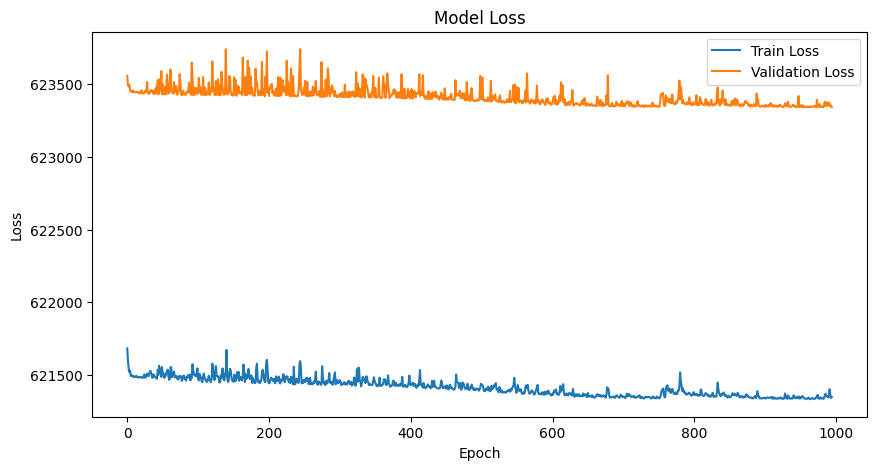

4/4 [==============================] - 0s 1ms/step


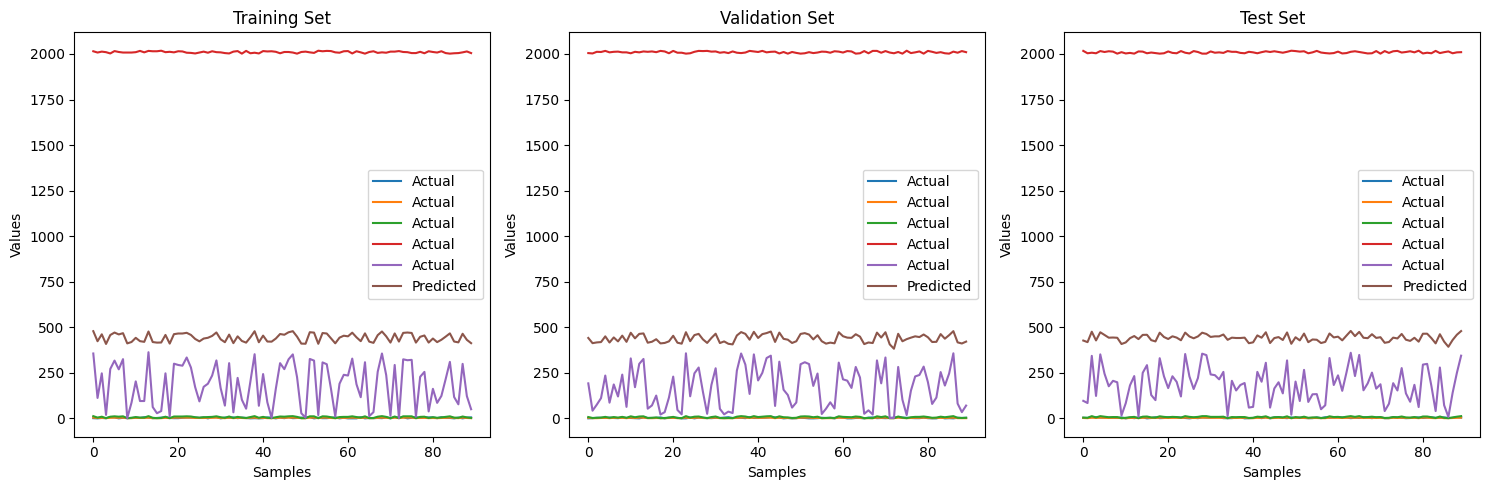

In [241]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['loss'][5:], label='Train Loss')
plt.plot(history_3.history['val_loss'][5:], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model_3.predict([X1_train, X2_train, X3_train, X4_train, X5_train])
y_val_pred = model_3.predict([X1_val, X2_val, X3_val, X4_val, X5_val])
y_test_pred = model_3.predict([X1_test, X2_test, X3_test, X4_test, X5_test])
y_val_pred = y_val_pred.flatten()

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train[-90:], label='Actual')
plt.plot(y_train_pred[-90:], label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val[-90:], label='Actual')
plt.plot(y_val_pred[-90:], label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test[-90:], label='Actual')
plt.plot(y_test_pred[-90:], label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [242]:

val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
print(f'Validation RMSE for Dense Model: {val_rmse}')

# Evaluate the model on the test set and calculate RMSE
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print(f'Test RMSE for Dense Model: {test_rmse}')

ValueError: y_true and y_pred have different number of output (5!=1)

In [243]:
# Evaluate the model on the validation set and calculate MAPE
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
print(f'Validation MAPE for Dense Model: {val_mape:.2%}')

# Evaluate the model on the test set and calculate MAPE
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
print(f'Test MAPE for Dense Model: {test_mape:.2%}')

ValueError: y_true and y_pred have different number of output (5!=1)

### Unvariate LSTM Models

In [244]:
def split_sequence(sequence, n_steps):
    X, y = [], []
    
    # Iterate over the sequence to create input-output pairs
    for i in range(len(sequence) - n_steps):
        # Extract input and output parts of the sequence
        seq_x = sequence[i:i + n_steps]
        seq_y = sequence[i + n_steps]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [245]:
# define input sequence
raw_seq = annual_data['duration.s'].values.reshape(-1, 1)
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[[160]
 [672]
 [516]] [752]
[[672]
 [516]
 [752]] [296]
[[516]
 [752]
 [296]] [264]
[[752]
 [296]
 [264]] [944]
[[296]
 [264]
 [944]] [204]
[[264]
 [944]
 [204]] [264]
[[944]
 [204]
 [264]] [608]
[[204]
 [264]
 [608]] [444]
[[264]
 [608]
 [444]] [1200]
[[ 608]
 [ 444]
 [1200]] [336]
[[ 444]
 [1200]
 [ 336]] [320]
[[1200]
 [ 336]
 [ 320]] [564]
[[336]
 [320]
 [564]] [528]
[[320]
 [564]
 [528]] [168]
[[564]
 [528]
 [168]] [2436]
[[ 528]
 [ 168]
 [2436]] [284]
[[ 168]
 [2436]
 [ 284]] [1508]
[[2436]
 [ 284]
 [1508]] [140]
[[ 284]
 [1508]
 [ 140]] [180]
[[1508]
 [ 140]
 [ 180]] [152]
[[140]
 [180]
 [152]] [664]
[[180]
 [152]
 [664]] [664]
[[152]
 [664]
 [664]] [144]
[[664]
 [664]
 [144]] [260]
[[664]
 [144]
 [260]] [200]
[[144]
 [260]
 [200]] [344]
[[260]
 [200]
 [344]] [832]
[[200]
 [344]
 [832]] [300]
[[344]
 [832]
 [300]] [100]
[[832]
 [300]
 [100]] [304]
[[300]
 [100]
 [304]] [228]
[[100]
 [304]
 [228]] [324]
[[304]
 [228]
 [324]] [652]
[[228]
 [324]
 [652]] [788]
[[324]
 [652]
 [788]]

#### 1.2. Vanilla LSTM

In [246]:
# Define input sequence
raw_seq = annual_data['duration.s'].values.reshape(-1, 1)

# Choose number of time steps
n_steps = 3

# Split sequence into samples
X, y = split_sequence(raw_seq, n_steps)

# Reshape data into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, y, epochs=200, verbose=0)

# Demonstrate prediction with new data
x_input = np.array([70, 80, 90]).reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[238.48721]]


#### 1.3. Stacked LSTM


In [247]:
# Define the Stacked LSTM model
model = Sequential()

# Add the first LSTM layer with 50 units and ReLU activation
# return_sequences=True allows the output to be fed to the next LSTM layer
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))

# Add the second LSTM layer with 50 units and ReLU activation
# This layer will receive the full sequence from the previous LSTM layer
model.add(LSTM(50, activation='relu'))

# Add a Dense layer with 1 unit to produce the final output
model.add(Dense(1))

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# Demonstrate prediction with new data
x_input = np.array([70, 80, 90]).reshape((1, n_steps, n_features))
yhat = model(x_input)
print(yhat)

tf.Tensor([[212.8454]], shape=(1, 1), dtype=float32)


### 1.4. Bidirectional LSTM


In [248]:
# Define the Bidirectional LSTM model
model = Sequential()

# Add a Bidirectional LSTM layer with 50 units and ReLU activation
# The input sequence is processed in both forward and backward directions
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))

# Add a Dense layer with 1 unit to produce the final output
model.add(Dense(1))

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# Demonstrate prediction with new data
x_input = np.array([70, 80, 90]).reshape((1, n_steps, n_features))
yhat = model(x_input)
print(yhat)

tf.Tensor([[175.03223]], shape=(1, 1), dtype=float32)


### 1.5. CNN-LSTM


In [249]:
# Choose a number of time steps
n_steps = 4
raw_seq = annual_data['duration.s'].values.reshape(-1, 1)

# Split into samples
X, y = split_sequence(raw_seq, n_steps)
print(X)
print('=' * 40)
# Reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2  # Number of subsequences
n_steps = 2  # Timesteps per subsequence
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))
print(X)

[[[160]
  [672]
  [516]
  [752]]

 [[672]
  [516]
  [752]
  [296]]

 [[516]
  [752]
  [296]
  [264]]

 ...

 [[308]
  [812]
  [240]
  [288]]

 [[812]
  [240]
  [288]
  [124]]

 [[240]
  [288]
  [124]
  [336]]]
[[[[160]
   [672]]

  [[516]
   [752]]]


 [[[672]
   [516]]

  [[752]
   [296]]]


 [[[516]
   [752]]

  [[296]
   [264]]]


 ...


 [[[308]
   [812]]

  [[240]
   [288]]]


 [[[812]
   [240]]

  [[288]
   [124]]]


 [[[240]
   [288]]

  [[124]
   [336]]]]


In [252]:
# Initialize the model
model = Sequential()

# Add a TimeDistributed Conv1D layer
# This layer applies a 1D convolution to each subsequence independently
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))

# Add a TimeDistributed MaxPooling1D layer
# This layer applies max pooling to each subsequence independently
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

# Add a TimeDistributed Flatten layer
# This layer flattens the output of each subsequence independently
model.add(TimeDistributed(Flatten()))

# Add an LSTM layer
# This layer processes the combined output of the CNN layers
model.add(LSTM(50, activation='relu'))

# Add a Dense output layer
# This layer produces the final prediction
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, y, epochs=500, verbose=0)

# Demonstrate prediction
x_input = np.array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model(x_input)
print(yhat)

tf.Tensor([[272.3869]], shape=(1, 1), dtype=float32)


With this network model we have the different layers:

Once we have all the layers of the model, we need to compile it for training. For this purpose, the optimizer 'Adam' is used. The optimizer is of great importance because it is responsible for generating better weights. Its operation is based on the calculation of the gradient of the cost function for each weight (parameter) of the network.

### 2. Multivariate LSTM Models

In [251]:
### 2.1. Multiple Input Series

## 5. CONLCUSION

* 1. Are there seasonal patterns in the occurrence and characteristics of solar flares?  
   We can see that the SARIMA model has identified seasonal patterns in the occurrence and characteristics of solar flares. This indicates that there is an observed periodicity in the duration or total number of solar flares over time.

* 2. What is the long-term trend in the energy and duration of solar flares?  
   According to long-term analysis with our dataset, we can see that the trend remains fluctuating in periods of 11 or 12 years.

* 3. Is it possible to predict the duration and energy of a solar flare based on historical data?  
   SARIMA has proven effective in modeling and predicting seasonal fluctuations.

### POSSIBLE ANSWERS

After studying the solar flares, we can provide different explanations for the graphs, such as the trends and seasonality that may be explained by the orbit of stars in the system and their gravitational effects on the Sun.

CONCLUSION OF THE ANOMALY OF 2008  
As we have observed, there is a period of decline in the duration and total counts of solar flares in the year 2008. However, contrasting with other studies, we can demonstrate that it is a period of low solar activity when the Sun has fewer solar flares.